# **Testing of the sampling algorithms**

In this jupyter notebook we will be testing and showcasing our library SamplingLIB. It includes sampling algorithms along with some helper functions for visualization and benchmarking.

Sampling algorithms:
1. Random Walk Metropolis Hastings (MH)
2. Adaptive Metropolis (AM)
3. Delayed Rejection Adaptive Metropolis (DRAM)
4. DiffeRential Evolution Adaptive Metropolis (DREAM)

**We load classes from SamplingLIB and other requiered libraries**

In [1]:
from SamplingLIB import Sampling, MH, AM, DRAM, DREAM, benchmark_average, benchmark_parametrs
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import pandas as pd
import seaborn as sns

## **Testing data**

We create a few distribution function to demonstrate our methods on.

### **Donut distribution (dim=2)**

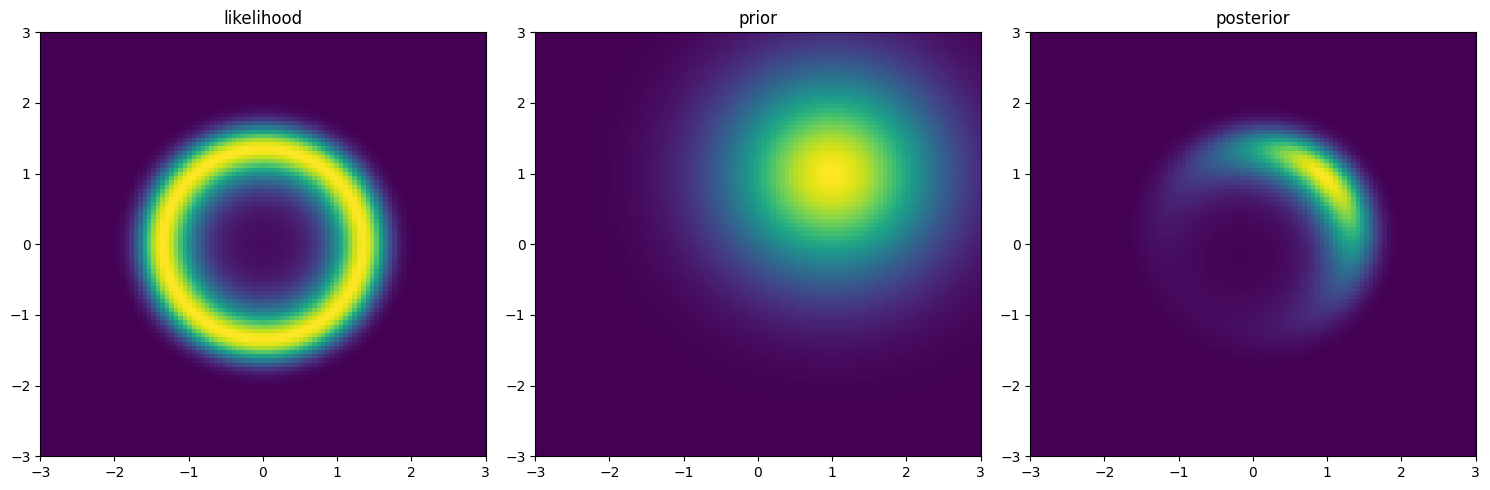

In [ ]:
# Parameters
donut_dim = 2
log = True

# Likelihood
#donut_y = 2.0  # observation
donut_noise = 0.5  # noise standard deviation
def donut_forward(u):
    return (u[0]**2+u[1]**2)
donut_y = 2.0

# Prior
prior_means = [[1.0, 1.0]]
prior_covs = [[1.0, 1.0]]

donut = Sampling(dimension=donut_dim, 
                 forward_model=donut_forward, 
                 observed_data=donut_y, 
                 noise_cov=donut_noise, 
                 prior_means=prior_means, 
                 prior_covs=prior_covs, 
                 log=log)

donut.visualize(max_points=100, ranges=[(-3, 3), (-3, 3)], visuals=["likelihood", "prior", "posterior"])

### **Rosenbrock (Banana) distribution (dim=2)**

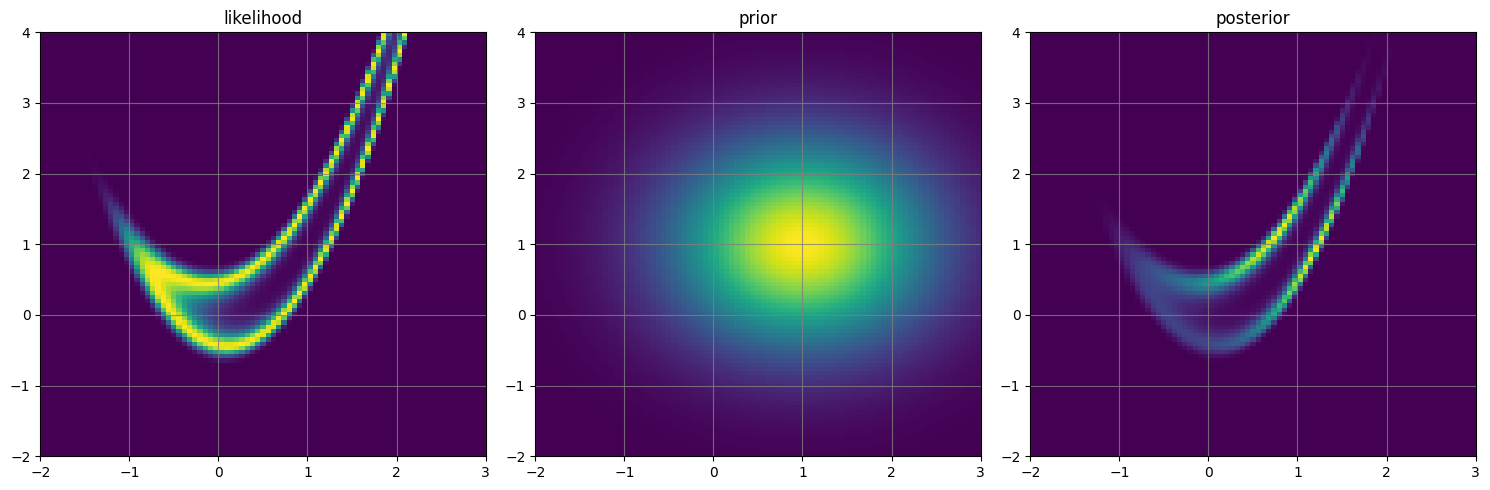

In [26]:
# Parameters
banana_dim = 2
log = True
banana_ranges = [(-2, 3), (-2, 4)]

# Likelihood
banana_y = 3.0  # observation
banana_noise = 1.0  # noise standard
def banana_forward(u):
    a = 1.0
    b = 10.0
    return (a-u[0])**2 + b*(u[1]-(u[0])**2)**2

# Prior
prior_means = [[1.0, 1.0]]
prior_covs = [[1.0, 1.0]]

banana = Sampling(dimension=banana_dim, 
                  forward_model=banana_forward, 
                  observed_data=banana_y, 
                  noise_cov=banana_noise, 
                  prior_means=prior_means, 
                  prior_covs=prior_covs, 
                  log=log)

banana.visualize(max_points=100, ranges=[(-2, 3), (-2, 4)], visuals=["likelihood", "prior", "posterior"])

### **Elipse distribution (dim=2)**

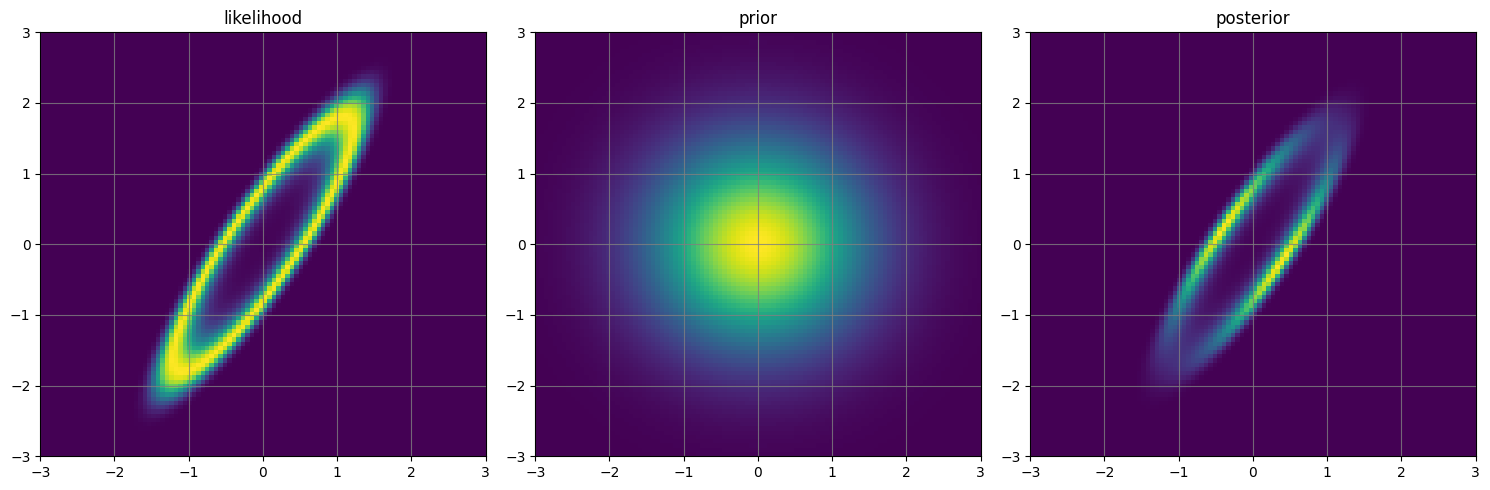

In [15]:
# Parameters
elipse_dim = 2
log = True

# Likelihood
elipse_y = 3.0  # observation
elipse_noise = 1.0  # noise standard deviation
def elipse_forward(u):
    return ((3*u[0]-1.5*u[1])**2+(+1.5*u[1]-1*u[0])**2)

# Prior
prior_means = [[0.0, 0.0]]
prior_covs = [[1.0, 1.0]]

elipse = Sampling(dimension=elipse_dim, 
                  forward_model=elipse_forward, 
                  observed_data=elipse_y, 
                  noise_cov=elipse_noise, 
                  prior_means=prior_means, 
                  prior_covs=prior_covs, 
                  log=log)

elipse.visualize(max_points=100, ranges=[(-3, 3), (-3, 3)], visuals=["likelihood", "prior", "posterior"])

### **Rainbow distribution (dim=2)**

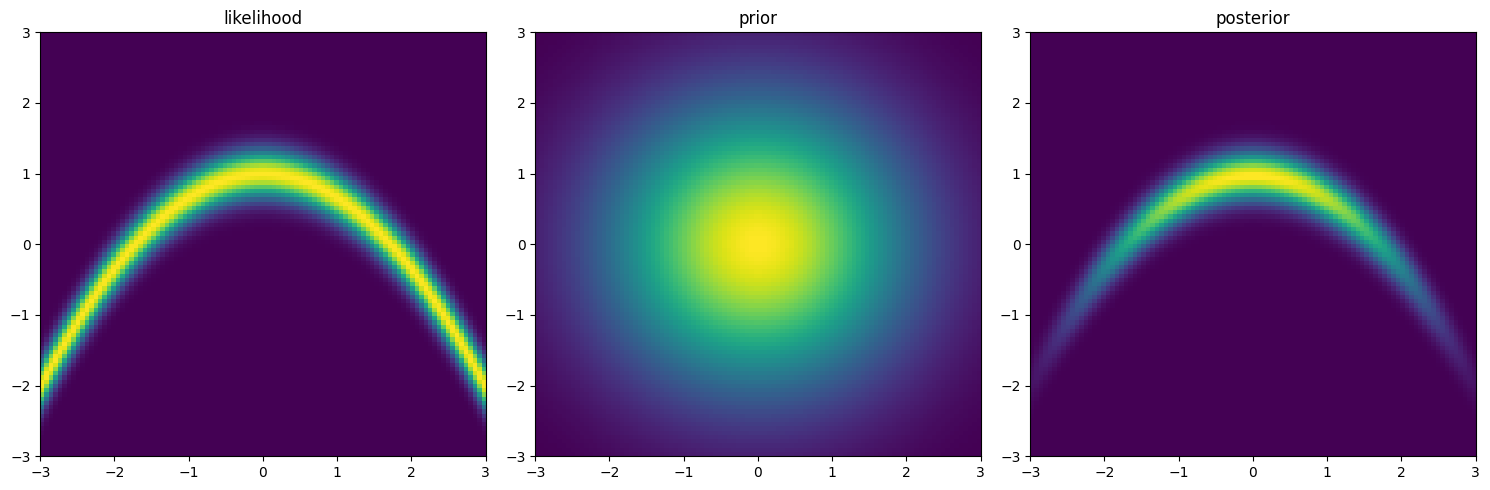

In [11]:
# Parameters
rainbow_dim = 2
log = True

# Prior
prior_means = [np.zeros(2)]
prior_covs = [2*np.eye(2)]

# Likelihood
def rainbow_forward(u):
    return np.array([u[0]**2 + 3*u[1]])
noise_cov = 0.5
y_obs = 3.0

# Set up Sampling class for rainbow
rainbow = Sampling(
    dimension=rainbow_dim,
    forward_model=rainbow_forward,
    observed_data=y_obs,
    noise_cov=noise_cov,
    prior_means=prior_means,
    prior_covs=prior_covs,
    log=log
)
rainbow.visualize(max_points=100, ranges=[(-3, 3), (-3, 3)], visuals=["likelihood", "prior", "posterior"])

### **Comet distribution (dim=2)**

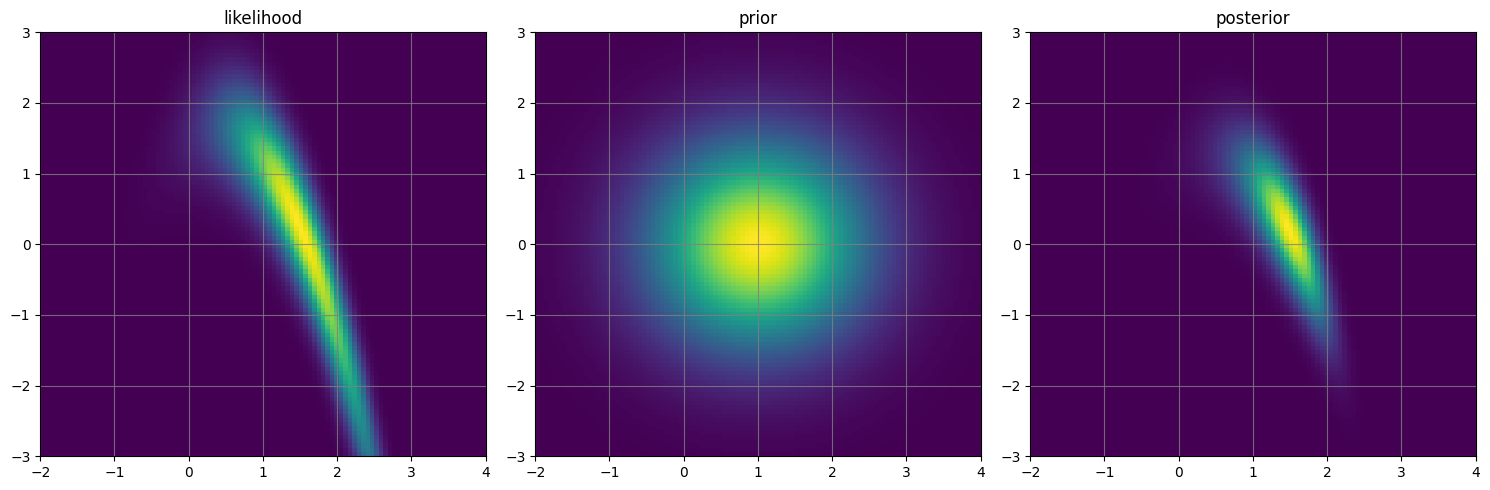

In [54]:
# Parameters
comet_dim = 2
log = True

# Prior
prior_means = [[1.0, 0.0]]
prior_covs = [np.eye(comet_dim)]

# Likelihood
def comet_forward(u):
    return np.array([u[0], u[1] + 1.0 * (u[0]**2 - 100)])
noise_cov = np.array([[0.5, 0.1], [0.3, 0.5]])
y_obs = np.array([1.5, -97.5])

# Set up Sampling class for comet
comet = Sampling(
    dimension=comet_dim,
    forward_model=comet_forward,
    observed_data=y_obs,
    noise_cov=noise_cov,
    prior_means=prior_means,
    prior_covs=prior_covs,
    log=log
)
comet.visualize(max_points=100, ranges=[(-2, 4), (-3, 3)], visuals=["likelihood", "prior", "posterior"])

### **Multimodal distribution (dim=2)**

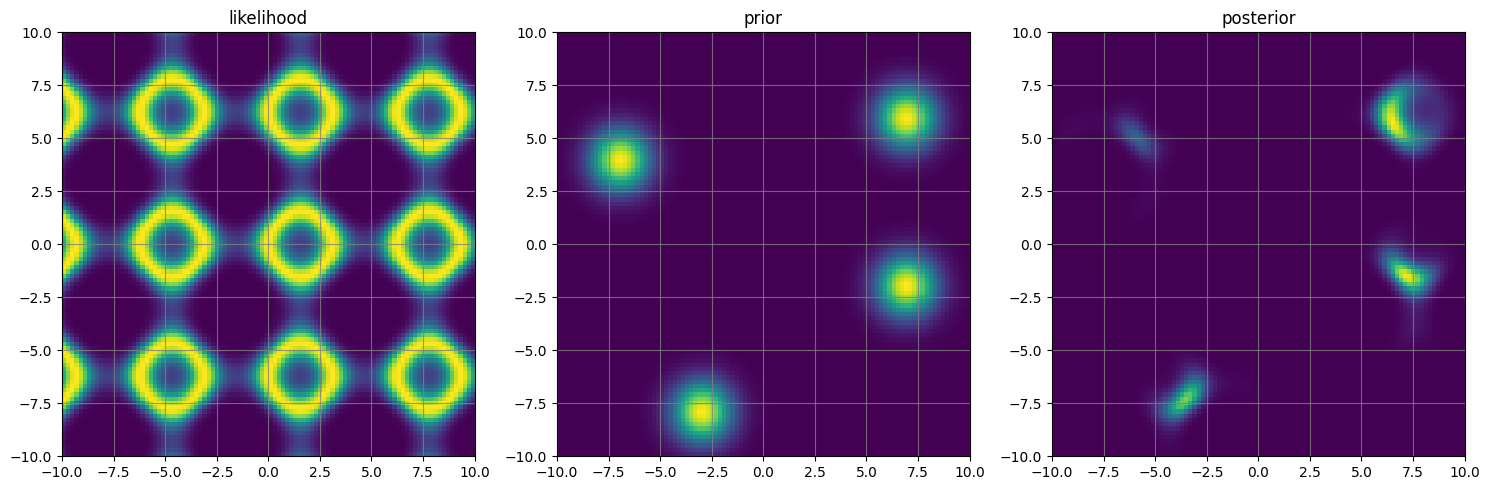

In [2]:
# Parameters
multimodal_dim = 2
log = True

# Likelihood
def multimodal_forward(u):
    return np.array([np.sin(u[0]) + np.cos(u[1])])
noise_cov = 0.3
y_obs = 1.0

# Prior
prior_means = [np.array([7, 6]), np.array([-7, 4]), np.array([7, -2]), np.array([-3, -8])]
prior_covs = [np.eye(2), np.eye(2), np.eye(2), np.eye(2)]

# Set up Sampling class for multimodal
multimodal = Sampling(
    dimension=multimodal_dim,
    forward_model=multimodal_forward,
    observed_data=y_obs,
    noise_cov=noise_cov,
    prior_means=prior_means,
    prior_covs=prior_covs,
    log=log
)
multimodal.visualize(max_points=100, ranges=[(-10, 10), (-10, 10)], visuals=["likelihood", "prior", "posterior"])

In [59]:
prior_means = np.array([[7, 6], [-7, 4], [7, -2], [-3, -8]])

# Get coordinate ranges
x_min, x_max = np.min(prior_means[:, 0]), np.max(prior_means[:, 0])  # -7 to 7 → range=14
y_min, y_max = np.min(prior_means[:, 1]), np.max(prior_means[:, 1])  # -8 to 6 → range=14

max_range = max(x_max - x_min, y_max - y_min)  # 14

In [60]:
max_range

np.int64(14)

### **Multidim distribution (dim=39)**

In [3]:
# Parameters
test_dim = 39
log = True

# Likelihood
# test_y = 1000.0
# test_noise = 10  # noise standard deviation
# def sphere_forward(x):
#     return np.sum(x**2)
def non_informative_likelihood(x):
    return 0.0

# Prior
prior_means = [np.random.uniform(-5, 5, test_dim)]
prior_covs = [np.random.uniform(1, 5, test_dim)]  # Ensures absolute value is never smaller than 1.

#test = Sampling(dimension=test_dim, forward_model=sphere_forward, observed_data=test_y, noise_cov=test_noise, prior_means=prior_means, prior_covs=prior_covs, log=log)
test = Sampling(dimension=test_dim, likelihood=non_informative_likelihood, prior_means=prior_means, prior_covs=prior_covs, log=log)


### **TSX**

In [ ]:
from wrapper4 import SolverTSX, observations
from denormalize import create_denormalizer_tsx_9subdomains

TSX_dim = 39
obs_dim = 144
log = True

# Likelihood
PriorIndependentComponents_instance = create_denormalizer_tsx_9subdomains()
solver_instance = SolverTSX()

class SolverWrapper:
    def __init__(self, transformer):
        self.solver = SolverTSX()
        self.transformer = transformer
        
    def __call__(self, u):
        """Wrapper that handles parameter transformation"""
        physical_params = self.transformer.transform(u)
        self.solver.set_parameters(physical_params)
        return self.solver.get_observations()

TSX_forward = SolverWrapper(PriorIndependentComponents_instance)

noise_std = 100.0
noise_cov = np.eye(obs_dim) * (noise_std**2)
y_obs = observations

# Prior
prior_means = [np.zeros(TSX_dim)]
prior_covs = [np.eye(TSX_dim)]

# Set up Sampling class for TSX
TSX = Sampling(
    dimension=TSX_dim,
    forward_model=TSX_forward,
    observed_data=y_obs,
    noise_cov=noise_cov,
    prior_means=prior_means,
    prior_covs=prior_covs,
    log=log
)

## **RWMH**

In this section we will test and visualize the results of MH algorithm.

### **Donut distribution (dim=2)**

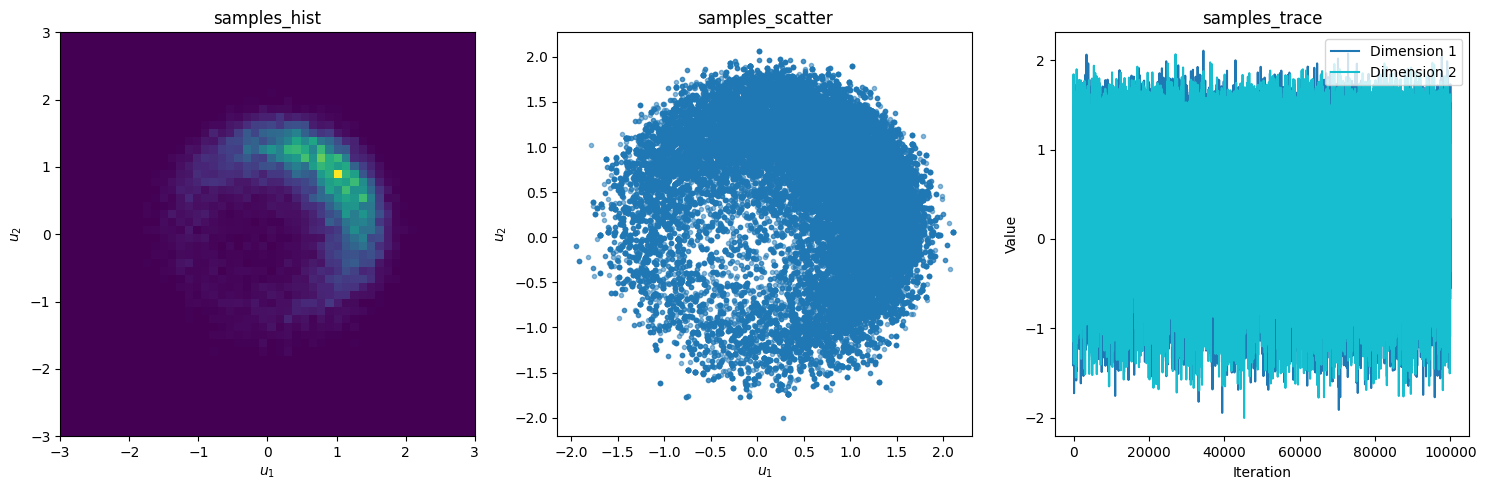

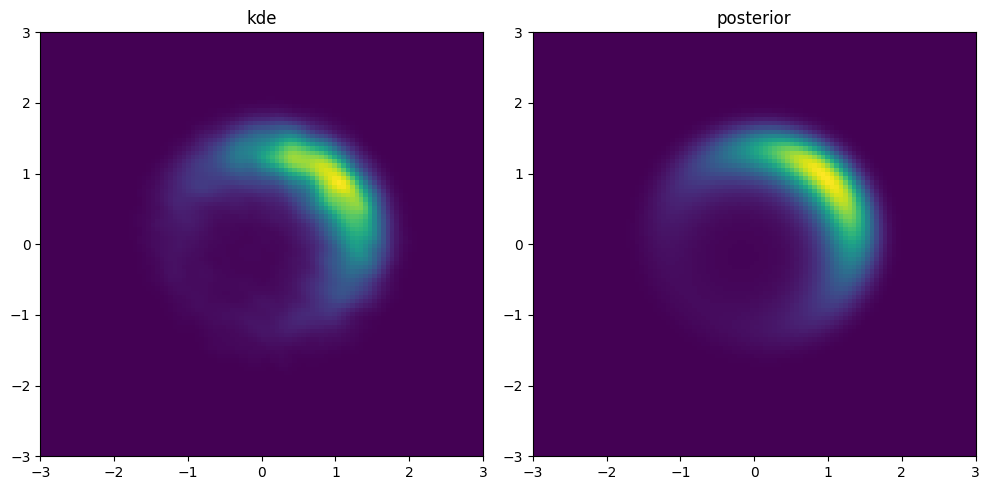

KL: 0.010643119117048927
Acceptance rate: 15.14%


In [12]:
initial_cov = None
scale_factor = None
burnin = 0.2

donut_MH = MH(distribution=donut, initial_cov=initial_cov, scale_factor=scale_factor, burnin=burnin)

initial = None
N = 100000

donut_MH.sample(initial=initial, N=N)
ranges = [(-3, 3), (-3, 3)]
donut_MH.visualize(["samples_hist", "samples_scatter", "samples_trace"], ranges=ranges)
print("KL:", donut_MH.sampling_quality(donut_MH.samples, visualise=True, ranges=ranges))
print(f"Acceptance rate: {(donut_MH.acc_rate * 100):.2f}%")

In [14]:
smpls = donut_MH.samples
print("Samples shape:", smpls.shape)
print("Mean of samples:", np.mean(smpls, axis=0))
normalized_euclidean_distance(smpls, np.array([1.0, 1.0]))
#print("True mean:", donut_DREAM.true_mean)

Samples shape: (100000, 2)
Mean of samples: [0.62598038 0.6158842 ]
Estimated mean: [0.62598038 0.6158842 ], True mean: [1. 1.]


np.float64(0.3791013214847203)

### **Banana distribution (dim=2)**

In [25]:
initial_cov = None
scale_factor = None
burnin = 0.2

banana_MH = MH(distribution=banana, 
               initial_cov=initial_cov, 
               scale_factor=scale_factor, 
               burnin=burnin)

initial = None
N = 100000

banana_MH.sample(initial=initial, N=N)
ranges = [(-2, 3), (-2, 4)]
banana_MH.visualize(visuals=["samples_hist", "samples_scatter", "samples_trace"], ranges=ranges)
print("KL:", banana_MH.sampling_quality(banana_MH.samples, visualise=True))
print(f"Acceptance rate: {(banana_MH.acc_rate * 100):.2f}%")

NameError: name 'banana' is not defined

### **Multimodal distribution (dim=2)**

In [9]:
initial_cov = None
scale_factor = 64.0
burnin = 0.01

multimodal_MH = MH(distribution=multimodal, 
                    initial_cov=initial_cov, 
                    scale_factor=scale_factor, 
                    burnin=burnin)

#### Benchmark

In [10]:
chains = 10
num_samples = 10000
initial = None
visualize = False
ranges = [(-10, 10), (-10, 10)]

Acc = True
distance = False
autocorrelation = True
ESS = True
R_hat = True
KL = True
old = False
runs = 5

multimodal_MH_benchmark_average, multimodal_MH_average_all_samples, multimodal_MH_benchmarks = benchmark_average(
    sampler=multimodal_MH,
    runs=runs,
    chains=chains,
    num_samples=num_samples,
    initial=initial,
    ranges=ranges,
    visualize=visualize,
    Acc=Acc,
    distance=distance,
    autocorrelation=autocorrelation,
    ESS=ESS,
    R_hat=R_hat,
    KL=KL,
    old=old
)

multimodal_MH.print_info()

Sampling Method: MH
Scale Factor: 64.0
Covariance Matrix: [[64.  0.]
 [ 0. 64.]]
Burn-in: 0.01
Mean of Samples: [2.79250328 0.73332508]
Acceptance Rate: 3.16%


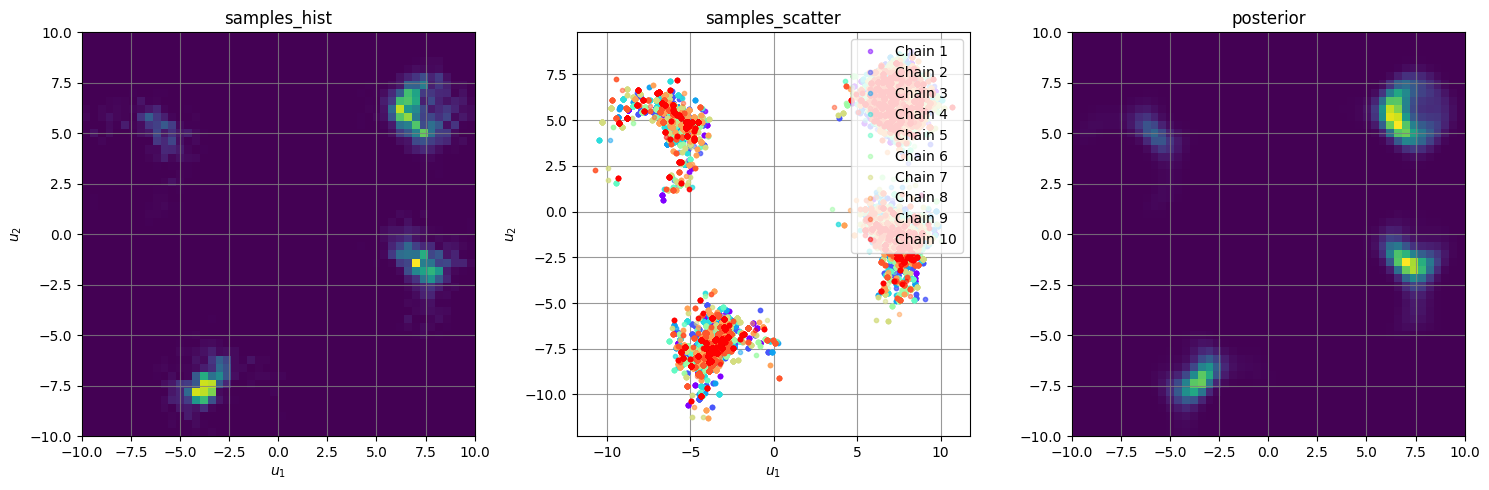

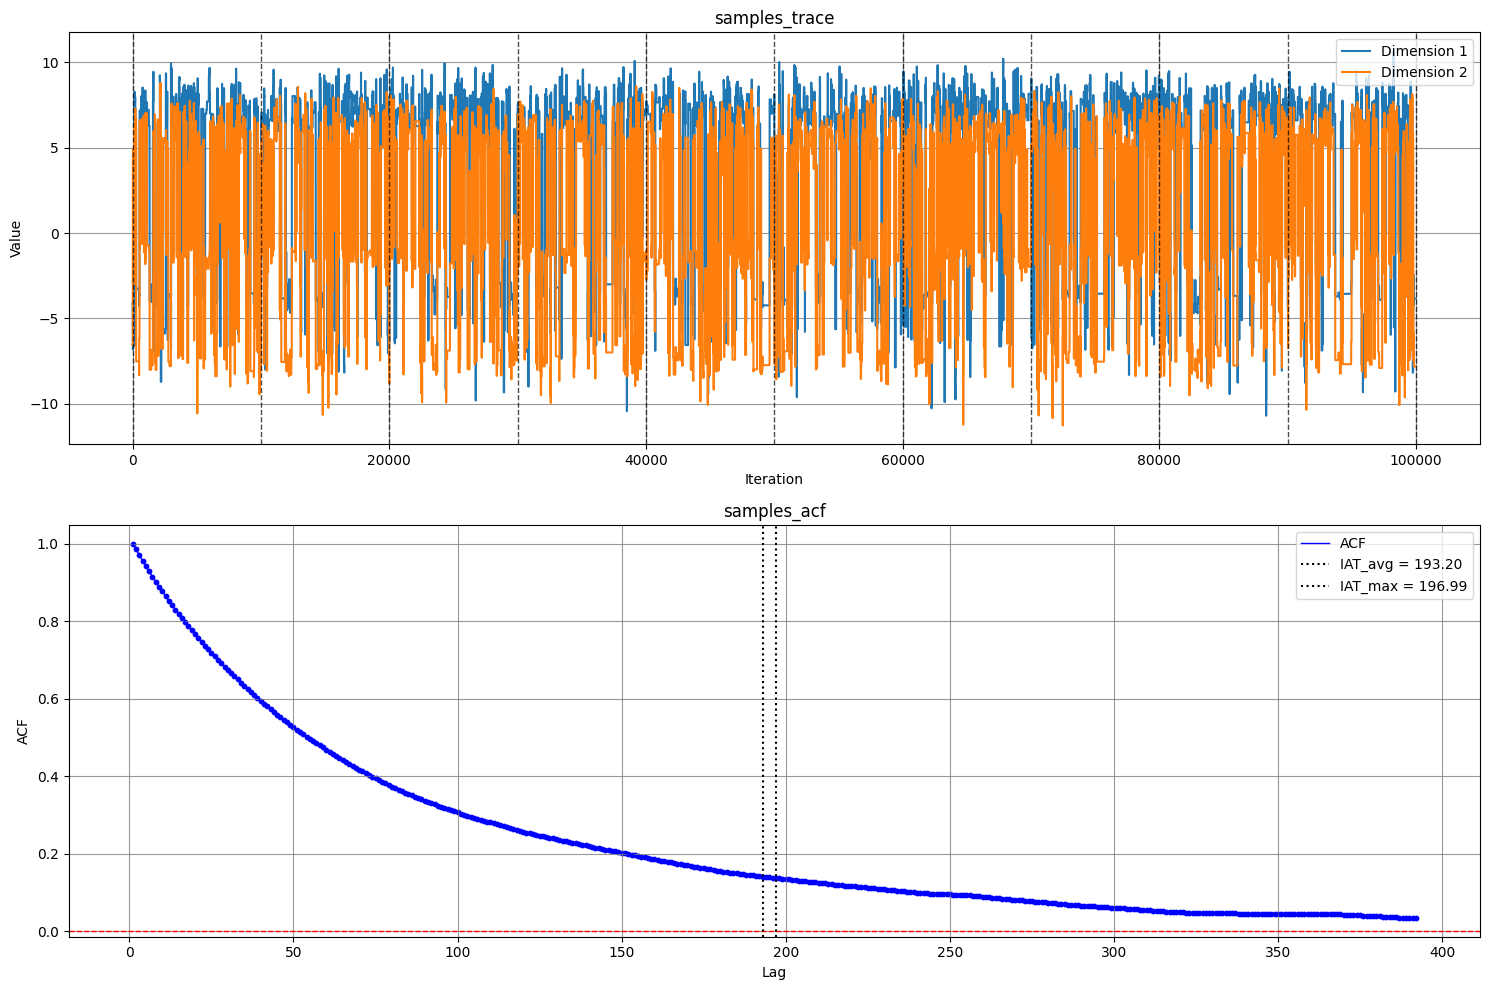

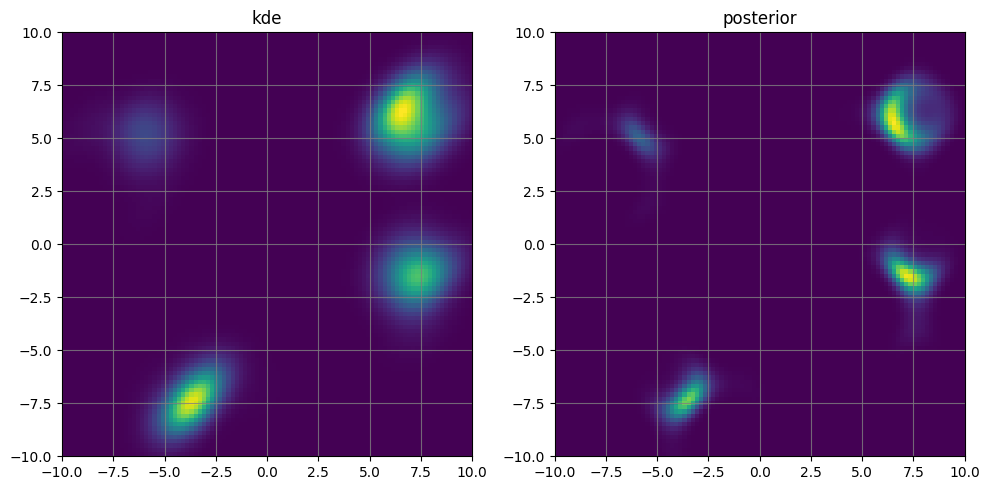

Runs   IAT_avg   IAT_max    ESS  Cost_per_sample  Cost_per_ESS     Acc  \
0    Run 1  193.1960  196.9950  517.0              1.0       193.424  0.0340   
1    Run 2  141.5620  145.3740  706.0              1.0       141.643  0.0330   
2    Run 3  135.0050  143.4810  740.0              1.0       135.135  0.0350   
3    Run 4  135.4370  135.5920  738.0              1.0       135.501  0.0360   
4    Run 5  165.7290  170.7790  603.0              1.0       165.837  0.0310   
5  Average  154.1858  158.4442  660.8              1.0       154.308  0.0338   

   R_hat_avg  R_hat_max      KL  
0     1.0189     1.0222  0.3141  
1     1.0132     1.0136  0.2914  
2     1.0185     1.0203  0.2966  
3     1.0056     1.0076  0.3208  
4     1.0238     1.0311  0.3003  
5     1.0160     1.0190  0.3046

In [11]:
samples = multimodal_MH_average_all_samples[0]
multimodal_MH.visualize(["samples_hist", "samples_scatter", "posterior"], ranges=ranges, samples=samples)
multimodal_MH.visualize(["samples_trace", "samples_acf"], ranges=ranges, samples=samples, vertical=True)
multimodal_MH.sampling_quality(samples, visualise=True, ranges=ranges)
multimodal_MH_benchmark_average
#multimodal_MH_benchmark_average.to_excel("multimodal_MH_benchmark_average.xlsx", index=False)
#multimodal_MH_benchmarks[0].to_excel("multimodal_MH_benchmark.xlsx", index=False)

New ranges: [(np.float64(-20.70586629953484), np.float64(26.290872849536832)), (np.float64(-22.765044497084503), np.float64(24.23169465198717))]


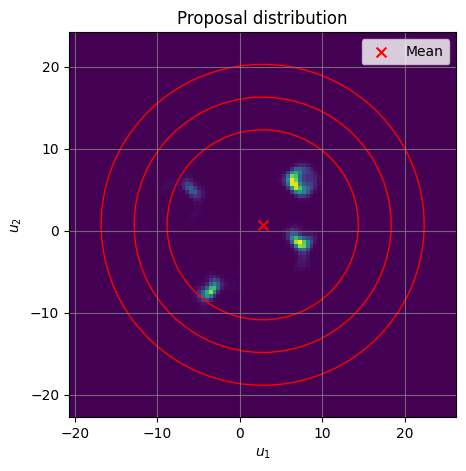

In [13]:
multimodal_MH.visualize_covariance_2d(ranges=ranges, visual=multimodal_MH.C, show=True)

### **Comet distribution (dim=2)**

In [ ]:
# Parameters for MH
initial_cov = None
scale_factor = None
burnin = 0.2

# Create MH instance for comet
comet_MH = MH(distribution=comet, 
                initial_cov=initial_cov, 
                scale_factor=scale_factor, 
                burnin=burnin)

#### Benchmark

In [ ]:
chains = 10
num_samples = 10000
initial = None
visualize = False
ranges = [(-2, 4), (-3, 3)]

Acc = True
distance = False
autocorrelation = True
ESS = True
R_hat = True
KL = True
old = False
runs = 1

comet_MH_benchmark_average, comet_MH_average_all_samples, comet_MH_benchmarks = benchmark_average(
    sampler=comet_MH,
    runs=runs,
    chains=chains,
    num_samples=num_samples,
    initial=initial,
    ranges=ranges,
    visualize=visualize,
    Acc=Acc,
    distance=distance,
    autocorrelation=autocorrelation,
    ESS=ESS,
    R_hat=R_hat,
    KL=KL,
    old=old
)

comet_MH.print_info()

Sampling Method: MH
Scale Factor: 2.88
Covariance Matrix: [[2.88 0.  ]
 [0.   2.88]]
Burn-in: 0.2
Mean of Samples: [1.40565823 0.19630898]
Acceptance Rate: 9.91%


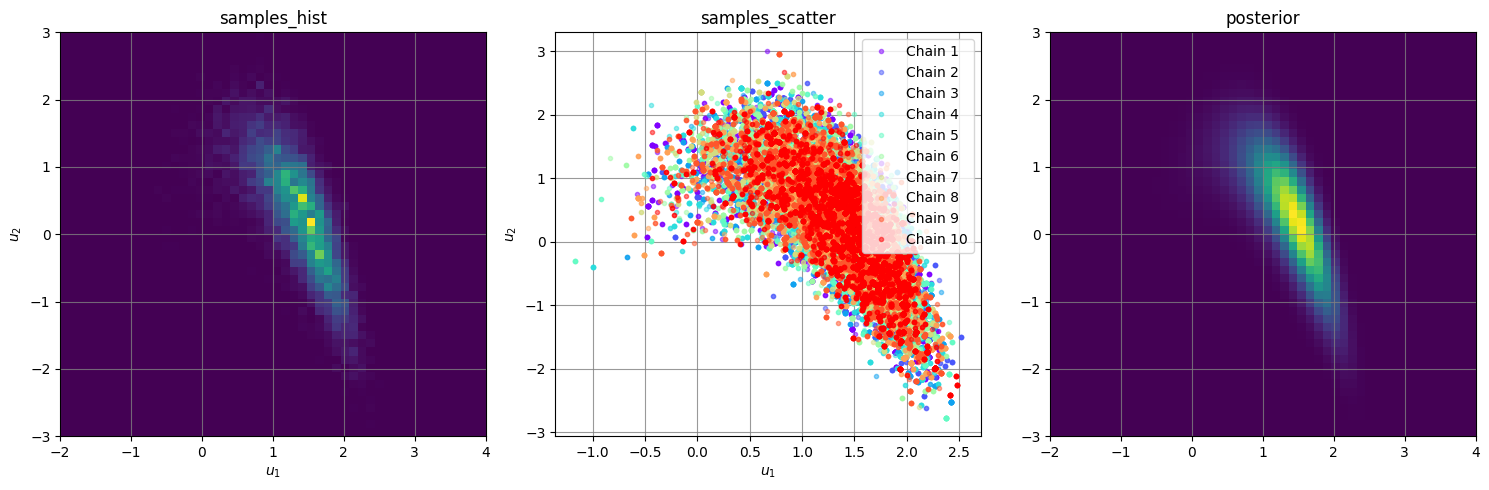

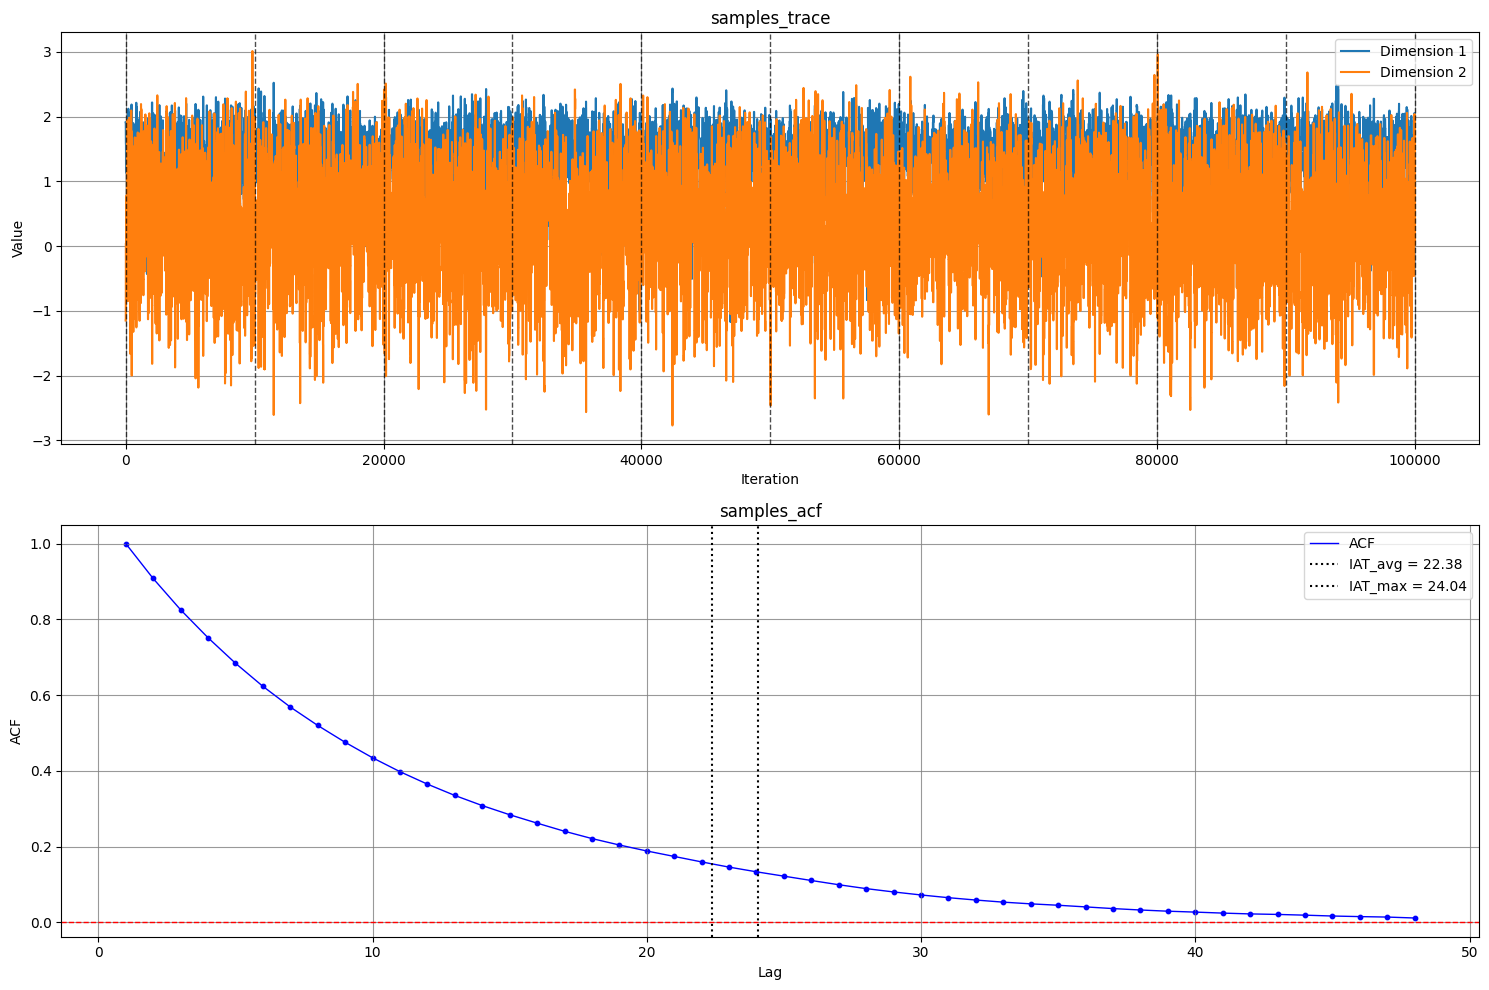

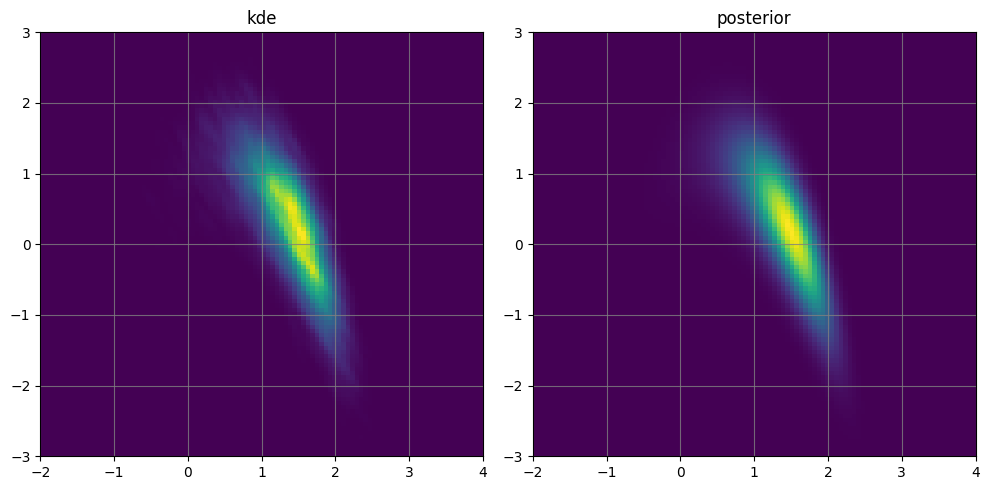

Runs  IAT_avg  IAT_max     ESS  Cost_per_sample  Cost_per_ESS    Acc  \
0    Run 1   22.377   24.041  4468.0              1.0        22.381  0.103   
1  Average   22.377   24.041  4468.0              1.0        22.381  0.103   

   R_hat_avg  R_hat_max      KL  
0     1.0025     1.0026  0.0093  
1     1.0025     1.0026  0.0093

In [ ]:
samples = comet_MH_average_all_samples[0]
comet_MH.visualize(["samples_hist", "samples_scatter", "posterior"], ranges=ranges, samples=samples)
comet_MH.visualize(["samples_trace", "samples_acf"], ranges=ranges, samples=samples, vertical=True)
comet_MH.sampling_quality(samples, visualise=True, ranges=ranges)
comet_MH_benchmark_average
#comet_MH_benchmark_average.to_excel("comet_MH_benchmark_average.xlsx", index=False)
#comet_MH_benchmarks[0].to_excel("comet_MH_benchmark.xlsx", index=False)

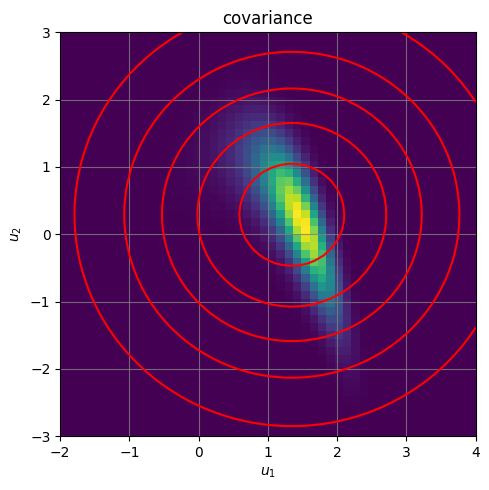

In [ ]:
comet_MH.visualize(ranges=ranges, visual=comet_MH.C, show=True)

## **AM**

### **Comet distribution (dim=2)**

In [ ]:
# Parameters for AM
initial_cov = None
scale_factor = None
initial = None
burnin = 0.2
eps = 1e-5
update_step = 1

# Create AM instance for comet
comet_AM = AM(distribution=comet, 
              initial_cov=initial_cov, 
              scale_factor=scale_factor, 
              burnin=burnin, 
              eps=eps, 
              update_step=update_step)

#### Benchmark

In [ ]:
chains = 10
num_samples = 10000
initial = None
visualize = False
ranges = [(-2, 4), (-3, 3)]

Acc = True
distance = False
autocorrelation = True
ESS = True
R_hat = True
KL = True
old = False
runs = 10

comet_AM_benchmark_average, comet_AM_average_all_samples, comet_AM_benchmarks = benchmark_average(
    sampler=comet_AM,
    runs=runs,
    chains=chains,
    num_samples=num_samples,
    initial=initial,
    ranges=ranges,
    visualize=visualize,
    Acc=Acc,
    distance=distance,
    autocorrelation=autocorrelation,
    ESS=ESS,
    R_hat=R_hat,
    KL=KL,
    old=old
)

comet_AM.print_info()

Sampling Method: AM
Scale Factor: 2.88
t0: 0.01
Initial covariance (C0): [[2.88 0.  ]
 [0.   2.88]]
Covariance Matrix: [[ 0.61727878 -0.80766008]
 [-0.80766008  1.94095831]]
Epsilon: 1e-05
Burn-in: 0.2
Update Step: 1
Mean of Samples: [1.34551441 0.30193011]
Acceptance Rate: 29.40%


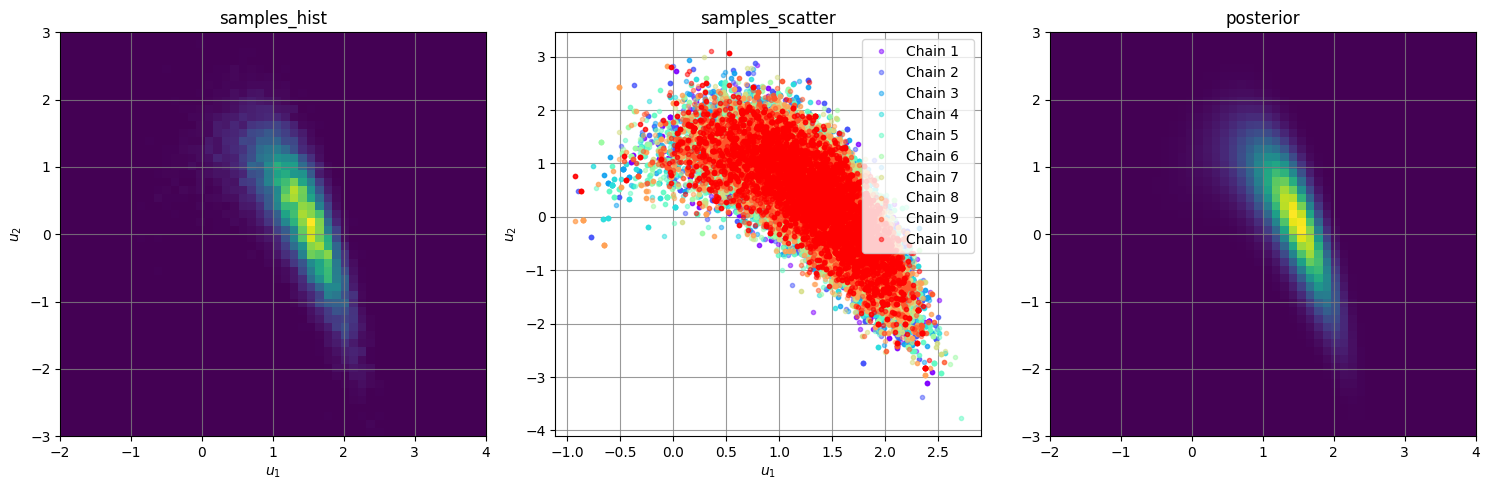

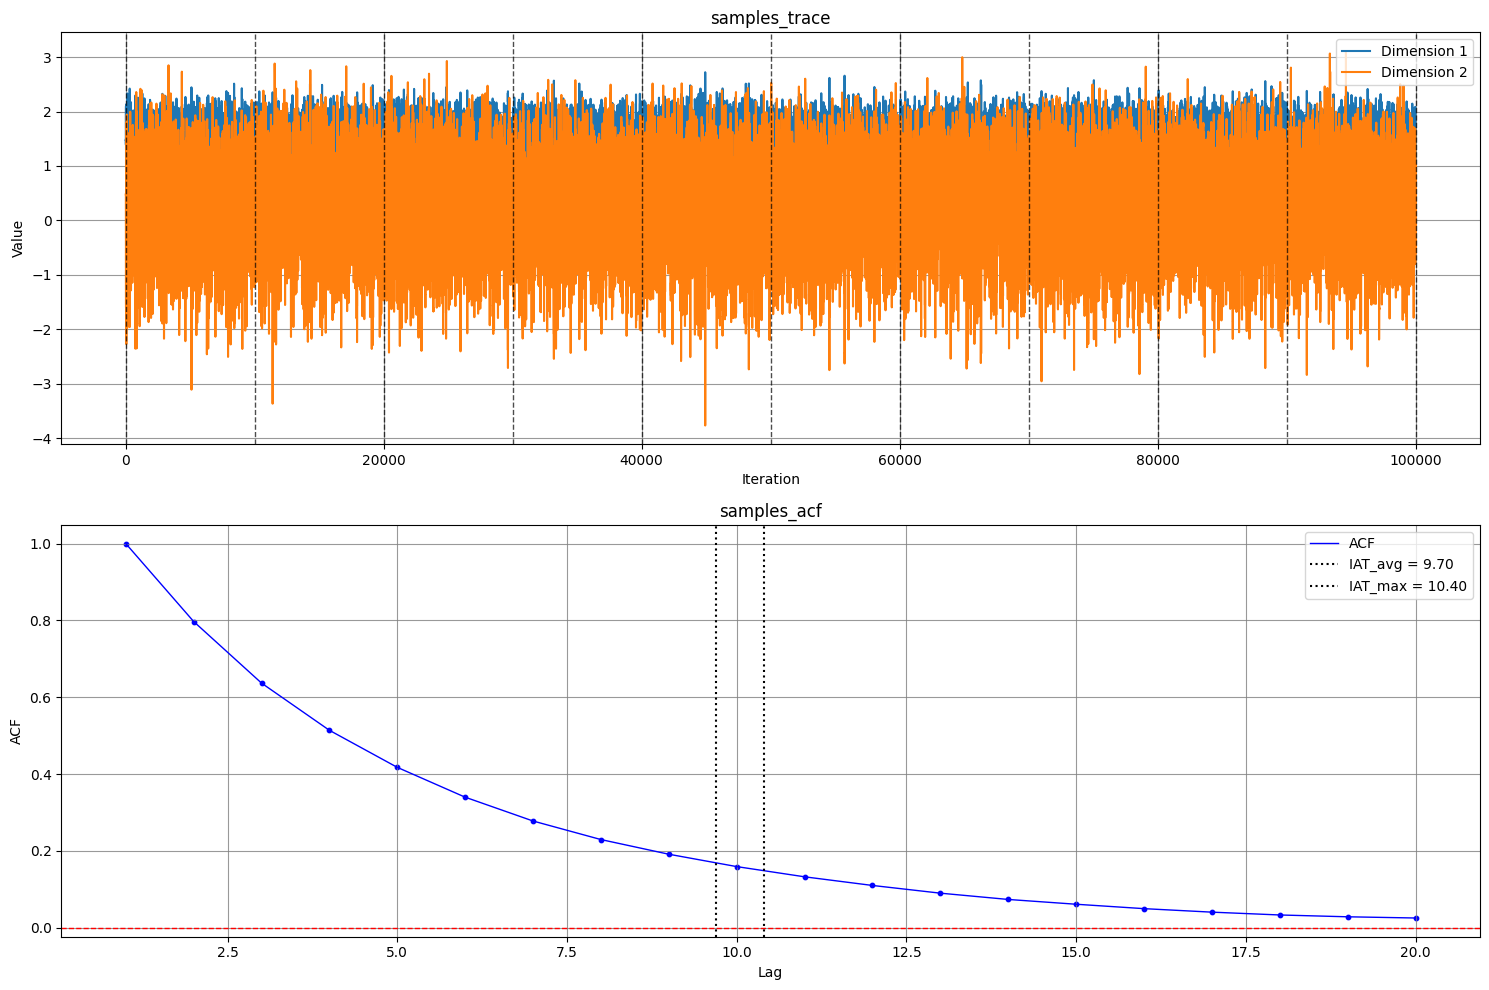

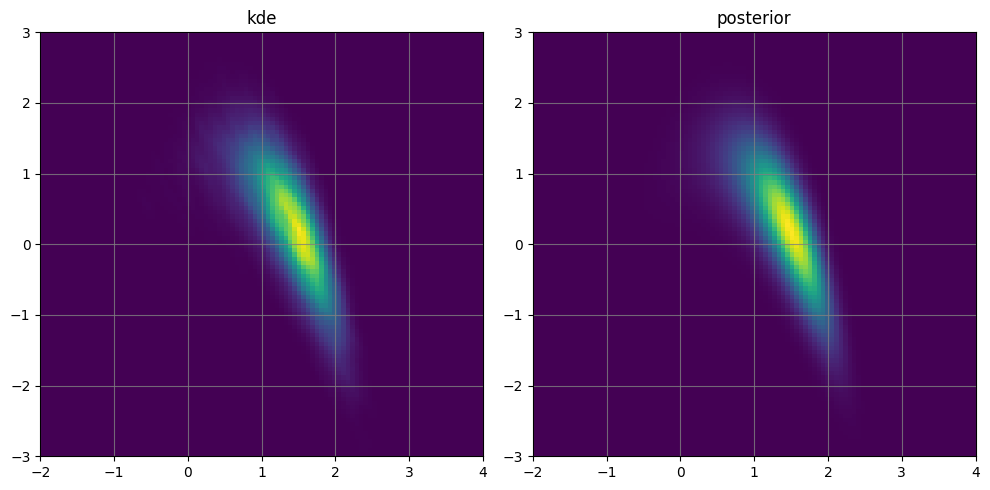

Runs  IAT_avg  IAT_max      ESS  Cost_per_sample  Cost_per_ESS    Acc  \
0    Run 1    9.699   10.401  10310.0              1.0         9.699  0.315   
1  Average    9.699   10.401  10310.0              1.0         9.699  0.315   

   R_hat_avg  R_hat_max      KL  
0     1.0014     1.0016  0.0048  
1     1.0014     1.0016  0.0048

In [ ]:
samples = comet_AM_average_all_samples[0]
comet_AM.visualize(["samples_hist", "samples_scatter", "posterior"], ranges=ranges, samples=samples)
comet_AM.visualize(["samples_trace", "samples_acf"], ranges=ranges, samples=samples, vertical=True)
comet_AM.sampling_quality(samples, visualise=True, ranges=ranges)
comet_AM_benchmark_average
#comet_AM_benchmark_average.to_excel("comet_AM_benchmark_average.xlsx", index=False)
#comet_AM_benchmarks[0].to_excel("comet_AM_benchmark.xlsx", index=False)

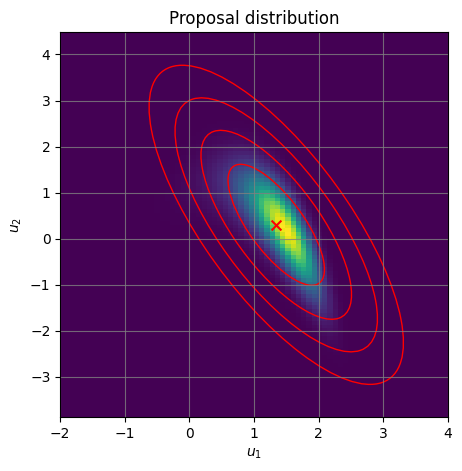

In [ ]:
ranges = [(-2, 4), (-3, 3)]
confidence_levels = [0.35, 0.65, 0.85, 0.95]
comet_AM.visualize_covariance_2d(ranges=ranges, visual=comet_AM.C[-1], show=True, confidence_levels=confidence_levels)

### **Donut distribution (dim=2)**

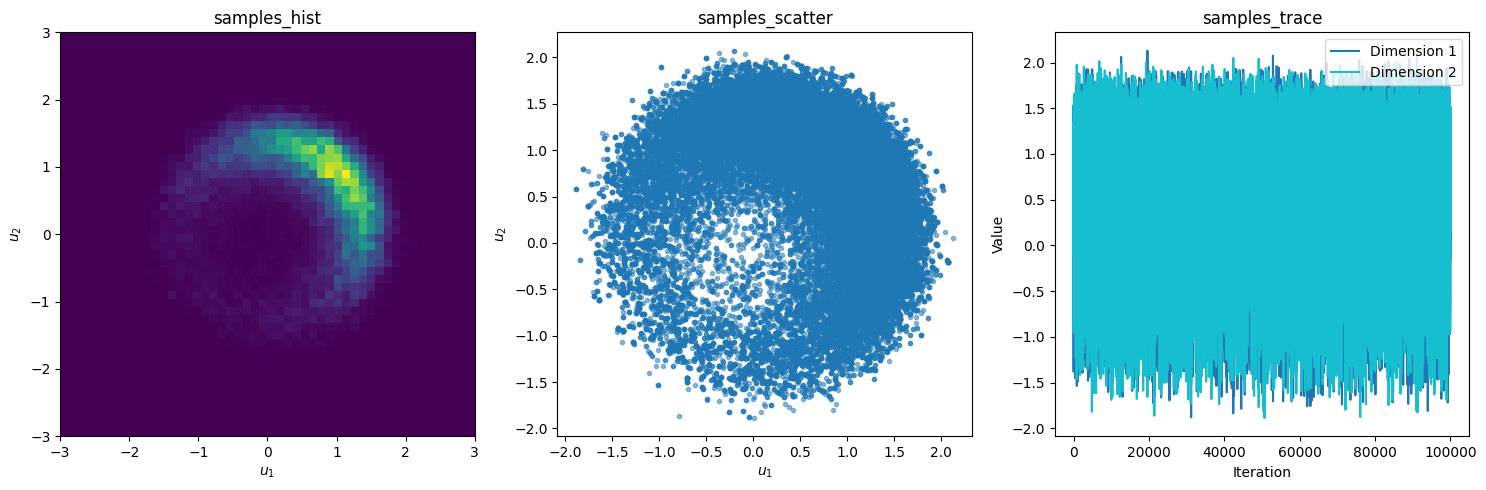

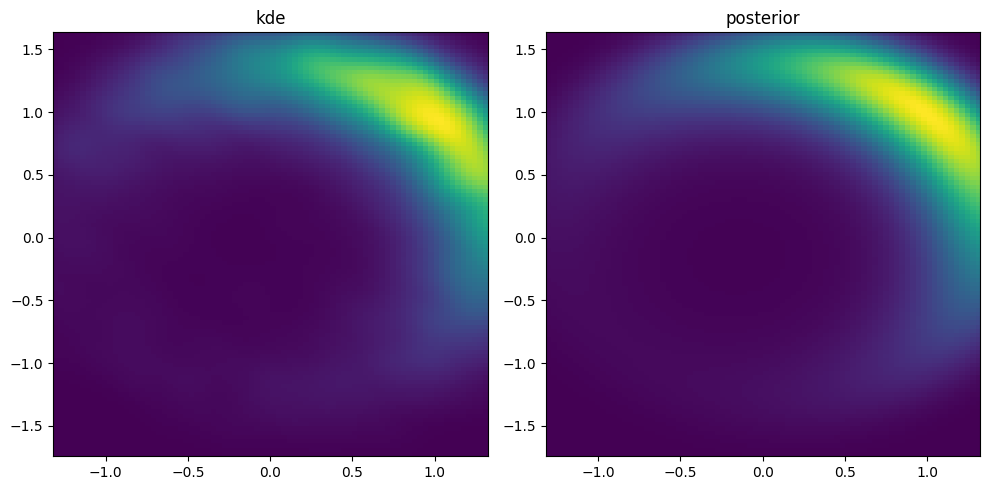

KL: 0.003951576463743745
Acceptance rate: 23.53%


In [66]:
initial_cov = None
scale_factor = None
burnin = 0.2
eps = 1e-5
update_step = 1

donut_AM = AM(distribution=donut, 
               initial_cov=initial_cov, 
               scale_factor=scale_factor, 
               burnin=burnin, 
               eps=eps, 
               update_step=update_step)

initial = None
N = 100000

donut_AM.sample(initial=initial, N=N)
ranges = [(-3, 3), (-3, 3)]
donut_AM.visualize(visuals=["samples_hist", "samples_scatter", "samples_trace"], ranges=ranges)
print("KL:", donut_AM.sampling_quality(donut_AM.samples, visualise=True))
print(f"Acceptance rate: {(donut_AM.acc_rate * 100):.2f}%")

### **Banana distribution (dim=2)**

In [27]:
initial_cov = None
scale_factor = None
burnin = 0.2
eps = 1e-5
update_step = 1

banana_AM = AM(distribution=banana, 
               initial_cov=initial_cov, 
               scale_factor=scale_factor, 
               burnin=burnin, eps=eps, 
               update_step=update_step)

#### Benchmark

In [28]:
chains = 10
num_samples = 10000
initial = None
visualize = False
ranges=[(-3, 3), (-3, 3)]

Acc = True
distance = False
autocorrelation = True
ESS = True
R_hat = True
KL = True
old = False
runs = 10

banana_AM_benchmark_average, banana_AM_average_all_samples, banana_AM_benchmarks = benchmark_average(
    sampler=banana_AM,
    runs=runs,
    chains=chains,
    num_samples=num_samples,
    initial=initial,
    ranges=ranges,
    visualize=visualize,
    Acc=Acc,
    distance=distance,
    autocorrelation=autocorrelation,
    ESS=ESS,
    R_hat=R_hat,
    KL=KL,
    old=old
)

banana_AM.print_info()

Sampling Method: AM
Scale Factor: 2.88
t0: 0.01
Initial covariance (C0): [[2.88 0.  ]
 [0.   2.88]]
Covariance Matrix: [[1.28495343 0.88797683]
 [0.88797683 1.49944501]]
Epsilon: 1e-05
Burn-in: 0.2
Update Step: 1
Mean of Samples: [0.51410644 0.75152229]
Acceptance Rate: 13.76%


In [61]:
banana_AM_benchmark_average.to_excel("banana_AM_benchmark_average.xlsx", index=False)
banana_AM_benchmarks[0].to_excel("banana_AM_benchmark.xlsx", index=False)

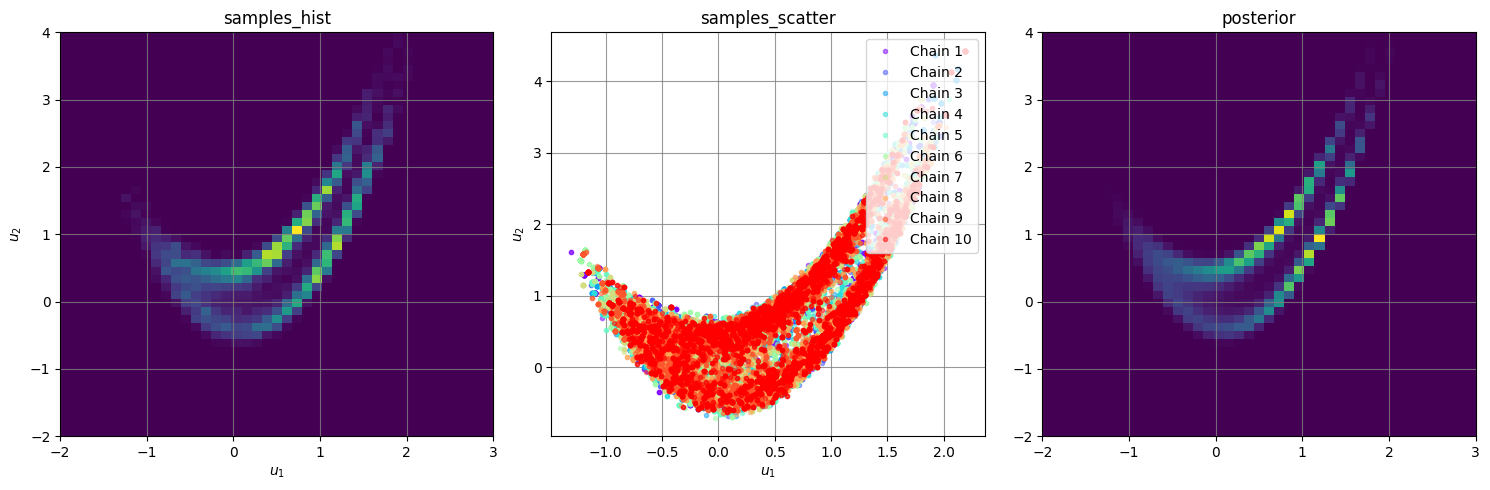

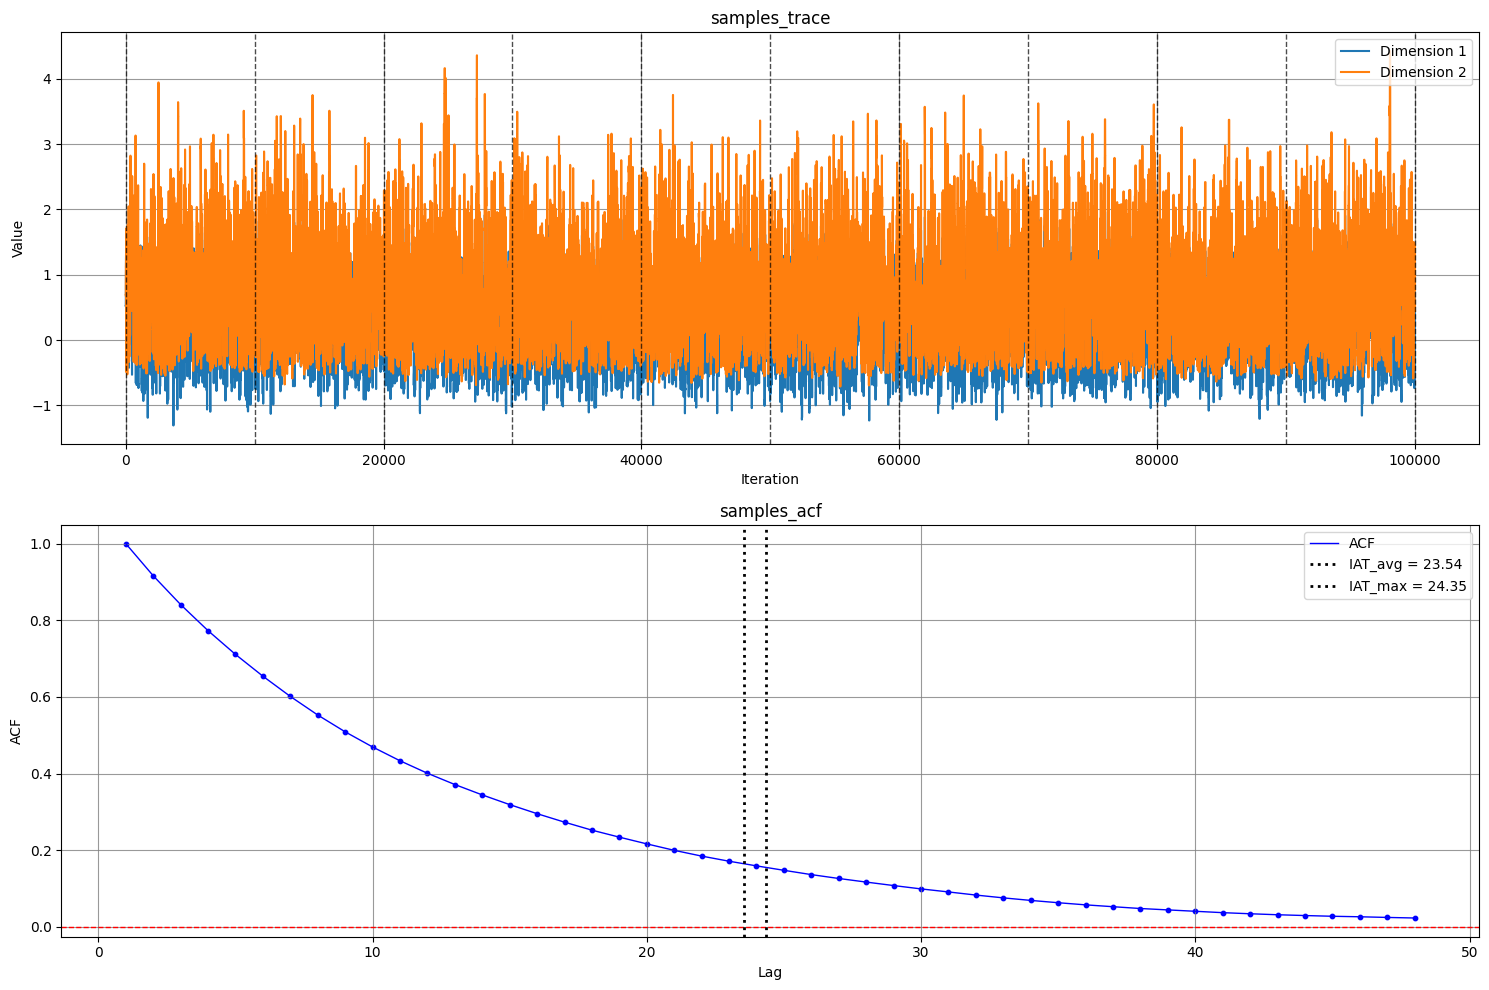

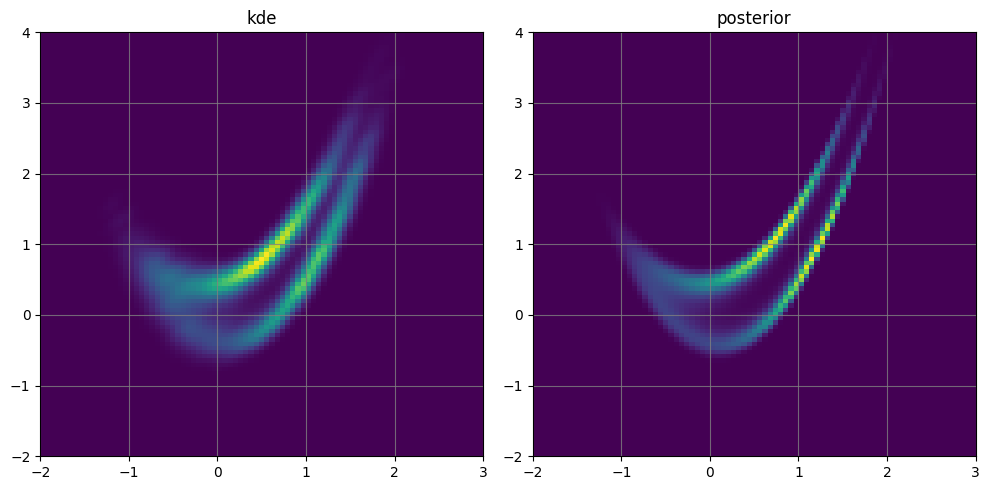

Runs  IAT_avg  IAT_max     ESS  Cost_per_sample  Cost_per_ESS     Acc  \
0     Run 1   23.538  24.3490  4248.0              1.0       23.5400  0.1360   
1     Run 2   25.328  25.4380  3948.0              1.0       25.3290  0.1330   
2     Run 3   26.772  28.0830  3735.0              1.0       26.7740  0.1320   
3     Run 4   24.550  24.9770  4073.0              1.0       24.5520  0.1340   
4     Run 5   25.627  25.9970  3902.0              1.0       25.6280  0.1380   
5     Run 6   24.826  25.5740  4028.0              1.0       24.8260  0.1340   
6     Run 7   26.084  26.1800  3833.0              1.0       26.0890  0.1330   
7     Run 8   23.596  25.0780  4238.0              1.0       23.5960  0.1340   
8     Run 9   25.057  26.4820  3990.0              1.0       25.0630  0.1360   
9    Run 10   24.812  25.2860  4030.0              1.0       24.8140  0.1350   
10  Average   25.019  25.7444  4002.5              1.0       25.0211  0.1345   

    R_hat_avg  R_hat_max      KL  
0      1.0028     1.0033  0.2033  
1      1.0029     1.0035  0.1999  
2      1.0025     1.0031  0.2060  
3      1.0020     1.0020  0.1994  
4      1.0022     1.0031  0.2001  
5      1.0012     1.0015  0.2043  
6      1.0029     1.0039  0.2026  
7      1.0042     1.0051  0.2065  
8      1.0031     1.0041  0.2014  
9      1.0010     1.0012  0.1980  
10     1.0025     1.0031  0.2022

In [62]:
ranges = [(-2, 3), (-2, 4)]
samples = banana_AM_average_all_samples[0]
banana_AM.visualize(["samples_hist", "samples_scatter", "posterior"], ranges=ranges, samples=samples)
banana_AM.visualize(["samples_trace", "samples_acf"], ranges=ranges, samples=samples, vertical=True)
banana_AM.sampling_quality(samples, visualise=True, ranges=ranges)
banana_AM_benchmark_average
#banana_AM_benchmark_average.to_excel("banana_AM_benchmark_average.xlsx", index=False)
#banana_AM_benchmarks[0].to_excel("banana_AM_benchmark.xlsx", index=False)

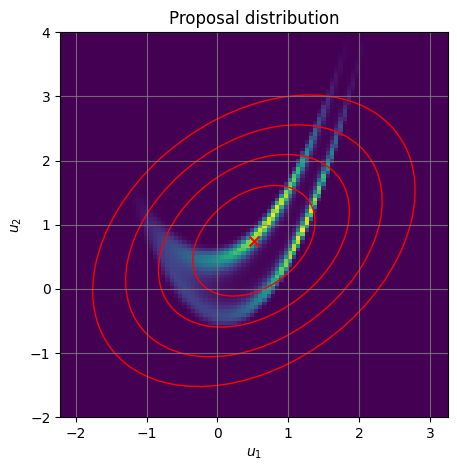

In [67]:
banana_AM.visualize_covariance_2d(ranges=ranges, visual=banana_AM.C[500], show=True)

#### Parameters

### **Elipse distribution (dim=2)**

In [16]:
initial_cov = None
scale_factor = None
burnin = 0.2
eps = 1e-5
update_step = 1

elipse_AM = AM(distribution=elipse, 
               initial_cov=initial_cov, 
               scale_factor=scale_factor, 
               burnin=burnin, 
               eps=eps, 
               update_step=update_step)

#### Benchmark

In [18]:
chains = 10
num_samples = 10000
initial = None
visualize = False
ranges=[(-3, 3), (-3, 3)]

Acc = True
distance = False
autocorrelation = True
ESS = True
R_hat = True
KL = True
old = False
runs = 10

elipse_AM_benchmark_average, elipse_AM_average_all_samples, elipse_AM_benchmarks = benchmark_average(
    sampler=elipse_AM,
    runs=runs,
    chains=chains,
    num_samples=num_samples,
    initial=initial,
    ranges=ranges,
    visualize=visualize,
    Acc=Acc,
    distance=distance,
    autocorrelation=autocorrelation,
    ESS=ESS,
    R_hat=R_hat,
    KL=KL,
    old=old
)

elipse_AM.print_info()

Sampling Method: AM
Scale Factor: 2.88
t0: 0.01
Initial covariance (C0): [[2.88 0.  ]
 [0.   2.88]]
Covariance Matrix: [[1.26579713 1.2650629 ]
 [1.2650629  2.31685814]]
Epsilon: 1e-05
Burn-in: 0.2
Update Step: 1
Mean of Samples: [0.03660213 0.05306602]
Acceptance Rate: 19.76%


In [68]:
elipse_AM_benchmark_average.to_excel("elipse_AM_benchmark_average.xlsx", index=False)
elipse_AM_benchmarks[0].to_excel("elipse_AM_benchmark.xlsx", index=False)

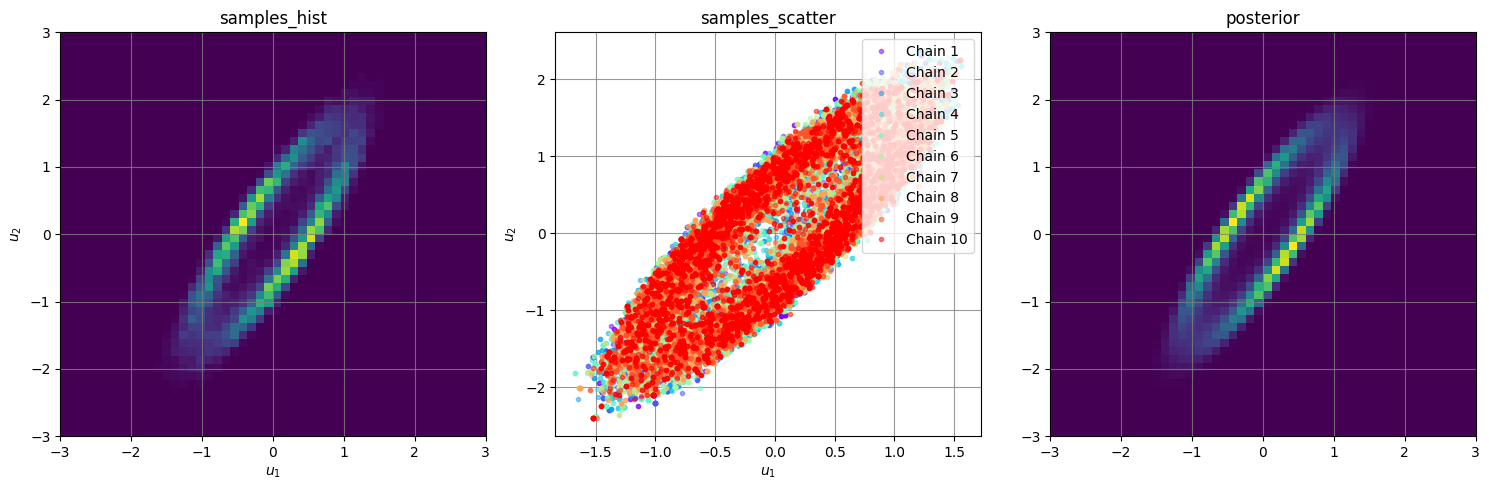

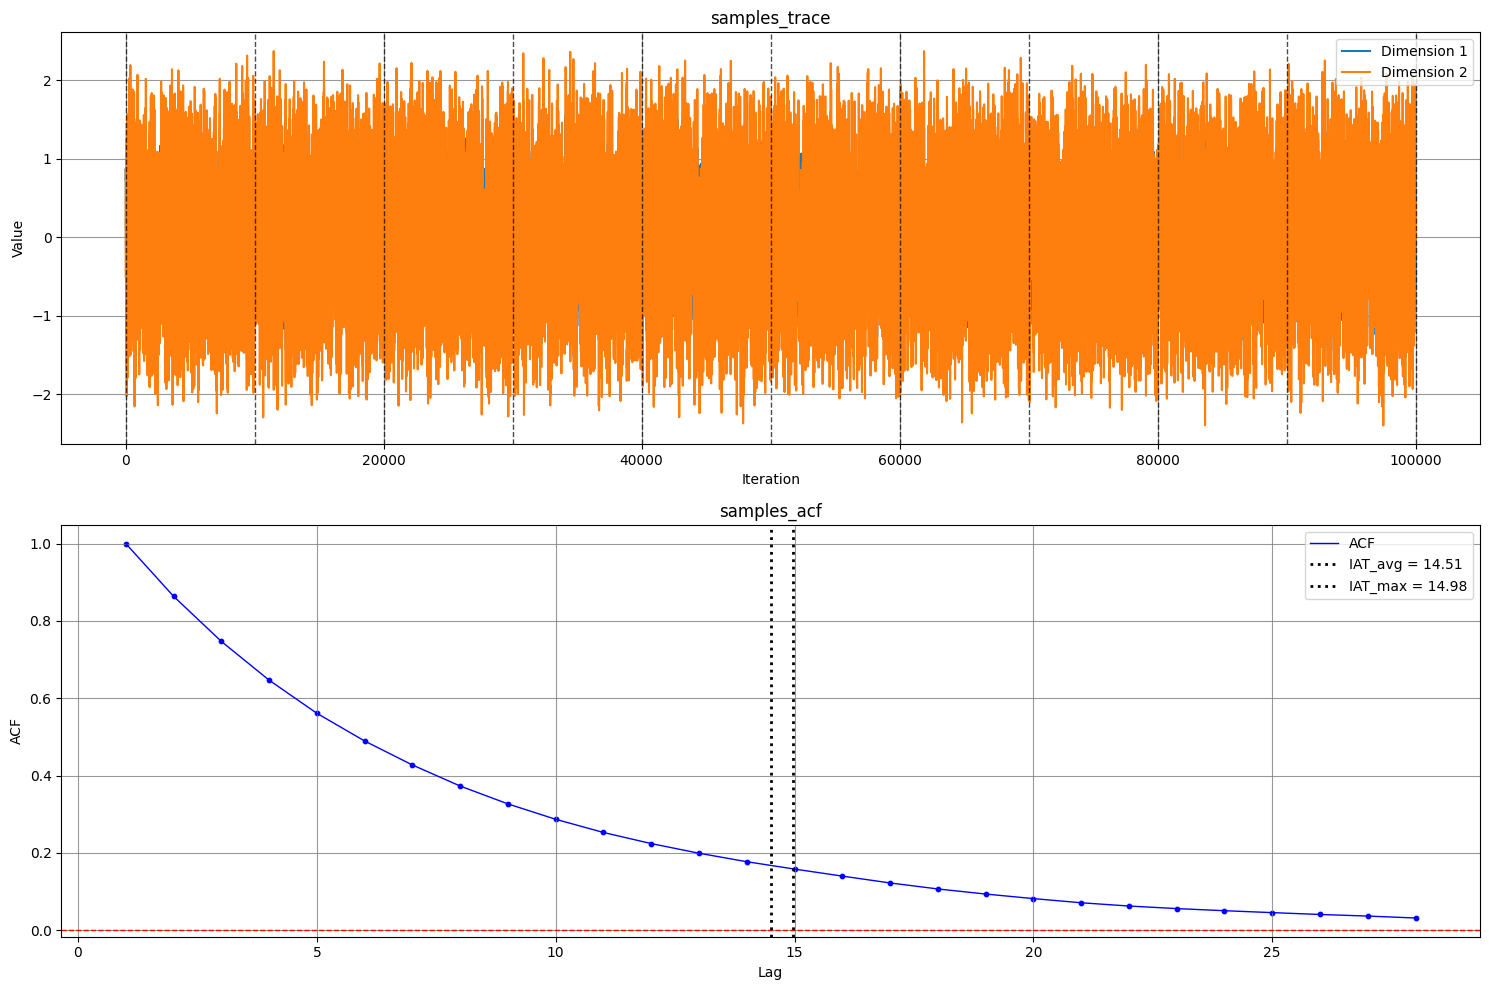

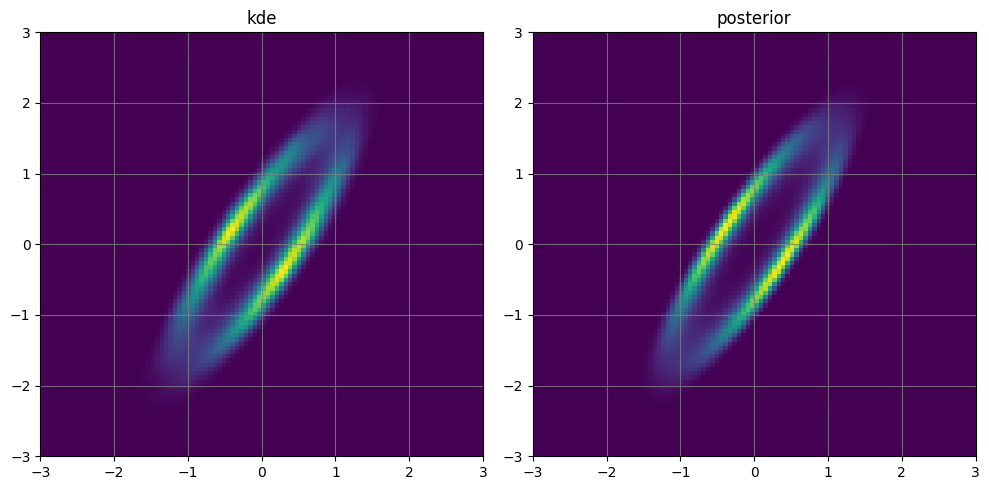

Runs  IAT_avg  IAT_max     ESS  Cost_per_sample  Cost_per_ESS     Acc  \
0     Run 1  14.5150  14.9780  6889.0              1.0       14.5160  0.1940   
1     Run 2  14.1720  14.7480  7056.0              1.0       14.1720  0.1970   
2     Run 3  13.7530  14.4710  7271.0              1.0       13.7530  0.1950   
3     Run 4  12.9090  13.0290  7746.0              1.0       12.9100  0.1960   
4     Run 5  14.1370  14.6090  7073.0              1.0       14.1380  0.2000   
5     Run 6  13.1990  13.3430  7576.0              1.0       13.2000  0.1960   
6     Run 7  12.6540  13.0000  7902.0              1.0       12.6550  0.2000   
7     Run 8  13.4560  14.0540  7431.0              1.0       13.4570  0.1980   
8     Run 9  14.1150  15.1750  7084.0              1.0       14.1160  0.1970   
9    Run 10  13.6460  14.4240  7328.0              1.0       13.6460  0.1950   
10  Average  13.6556  14.1831  7335.6              1.0       13.6563  0.1968   

    R_hat_avg  R_hat_max      KL  
0      1.0016     1.0020  0.0305  
1      1.0020     1.0020  0.0314  
2      1.0008     1.0009  0.0285  
3      1.0011     1.0013  0.0301  
4      1.0009     1.0012  0.0314  
5      1.0008     1.0009  0.0314  
6      1.0007     1.0008  0.0337  
7      1.0013     1.0015  0.0299  
8      1.0012     1.0014  0.0318  
9      1.0011     1.0012  0.0292  
10     1.0012     1.0013  0.0308

In [19]:
samples = elipse_AM_average_all_samples[0]
elipse_AM.visualize(["samples_hist", "samples_scatter", "posterior"], ranges=ranges, samples=samples)
elipse_AM.visualize(["samples_trace", "samples_acf"], ranges=ranges, samples=samples, vertical=True)
elipse_AM.sampling_quality(samples, visualise=True, ranges=ranges)
elipse_AM_benchmark_average
#elipse_AM_benchmark_average.to_excel("elipse_AM_benchmark_average.xlsx", index=False)
#elipse_AM_benchmarks[0].to_excel("elipse_AM_benchmark.xlsx", index=False)

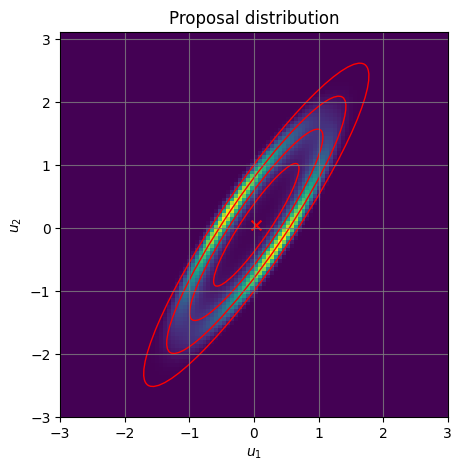

In [70]:
ranges = [(-3, 3), (-3, 3)]
elipse_AM.visualize_covariance_2d(ranges=ranges, visual=0.25*elipse_AM.C[101], show=True)

#### Parameters

## **DRAM**

### **Elipse distribution (dim=2)**

In [ ]:
initial_cov = None
scale_factor = None
burnin = 0.2
eps = 1e-5
update_step = 1
gammas = [1.5, 1.0, 0.5]
num_stages = 3

elipse_DRAM = DRAM(distribution=elipse, 
                   initial_cov=initial_cov, 
                   scale_factor=scale_factor, 
                   burnin=burnin, eps=eps, 
                   update_step=update_step, 
                   gammas=gammas, 
                   num_stages=num_stages)

#### Benchmark

In [49]:
chains = 10
num_samples = 10000
initial = None
visualize = False
ranges=[(-3, 3), (-3, 3)]

Acc = True
distance = False
autocorrelation = True
ESS = True
R_hat = True
KL = True
old = False
runs = 10

elipse_DRAM_benchmark_average, elipse_DRAM_average_all_samples, elipse_DRAM_benchmarks = benchmark_average(
    sampler=elipse_DRAM,
    runs=runs,
    chains=chains,
    num_samples=num_samples,
    initial=initial,
    ranges=ranges,
    visualize=visualize,
    Acc=Acc,
    distance=distance,
    autocorrelation=autocorrelation,
    ESS=ESS,
    R_hat=R_hat,
    KL=KL,
    old=old
)

elipse_DRAM.print_info()

Sampling Method: DRAM
Scale Factor: 2.88
t0: 0.01
Initial covariance (C0): [[2.88 0.  ]
 [0.   2.88]]
Covariance Matrix: [[1.2530443  1.26181077]
 [1.26181077 2.34370067]]
Epsilon: 1e-05
Burn-in: 0.2
Update Step: 1
Number of Stages: 2
Gammas: [1.0, 0.25]
Mean of Samples: [-0.02937152 -0.07076653]
Acceptance rate for stage 1: 19.69%
Acceptance rate for stage 2: 30.87%
-----------------------------------------------------------------------------------------
Acceptance rate: 44.48%


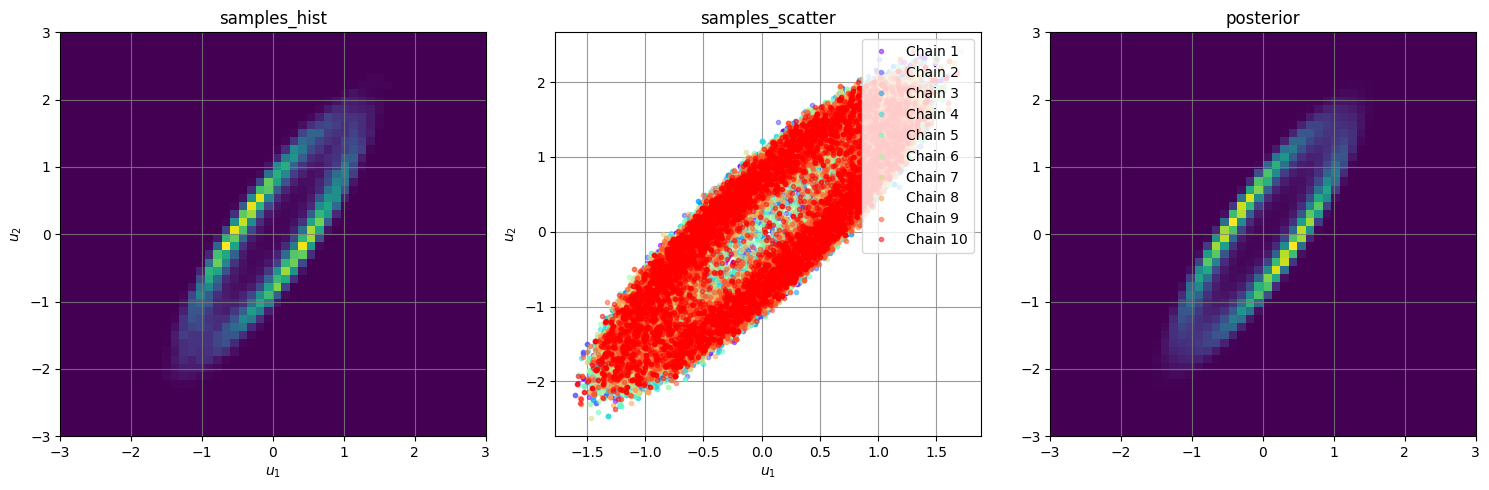

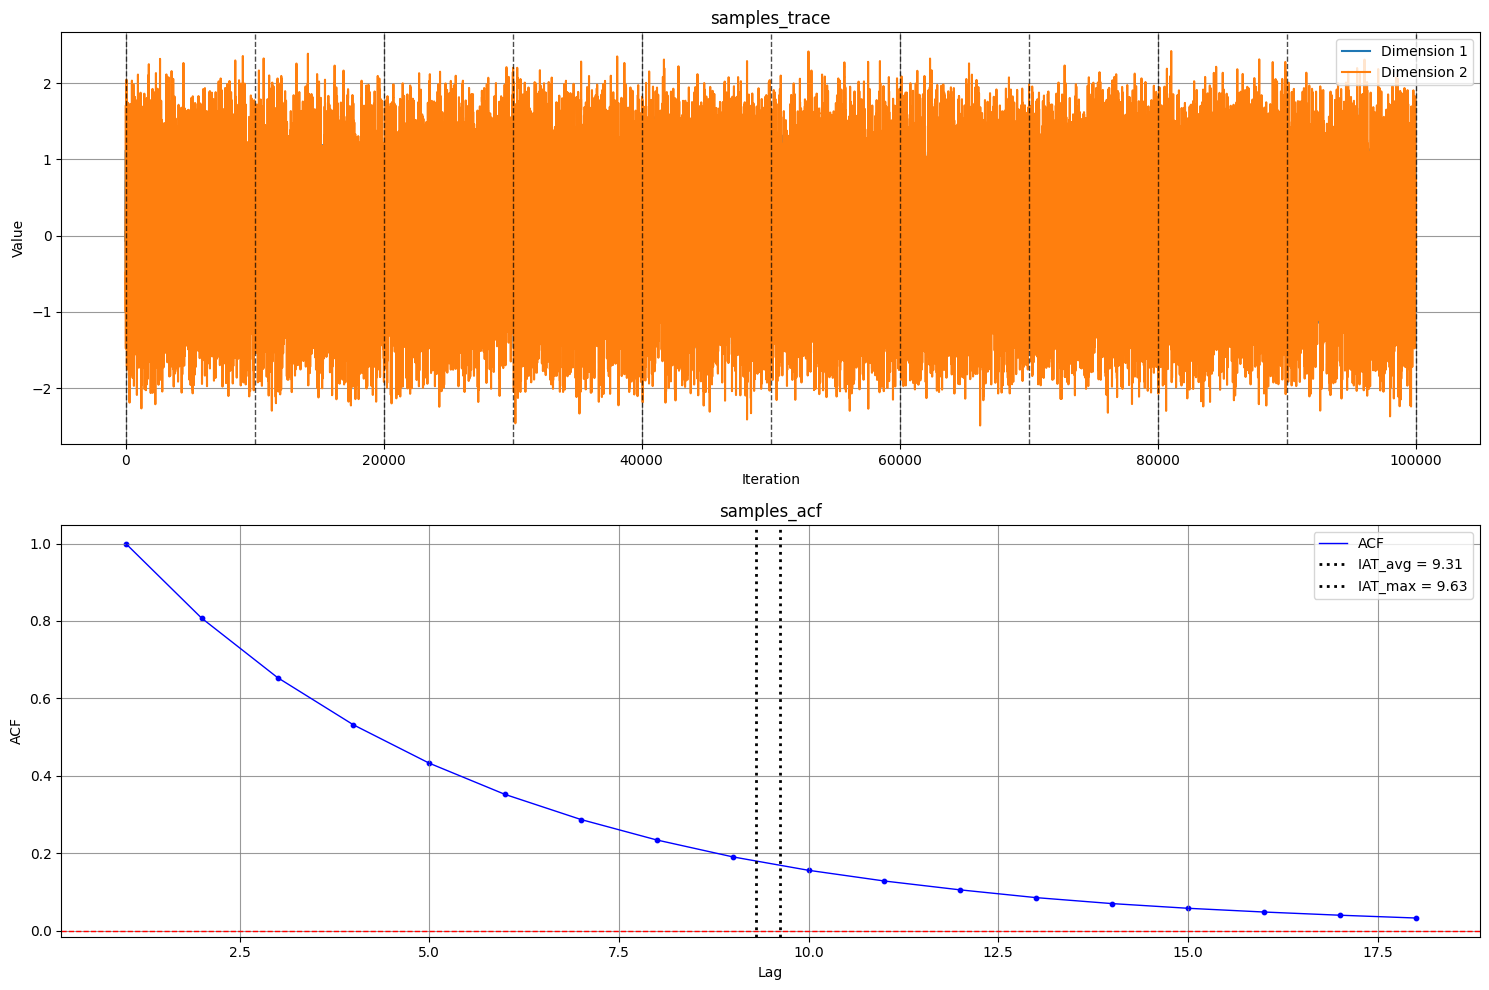

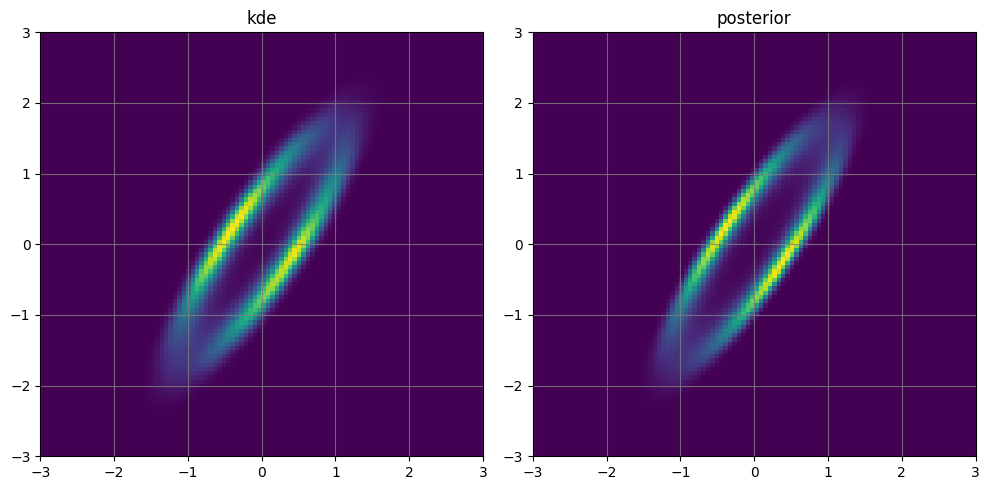

Runs  IAT_avg  IAT_max      ESS  Cost_per_sample  Cost_per_ESS     Acc  \
0     Run 1   9.3070   9.6260  10744.0            1.798       16.7360  0.4310   
1     Run 2   9.1520   9.5140  10926.0            1.802       16.4930  0.4300   
2     Run 3   9.7230  10.1490  10284.0            1.816       17.6580  0.4330   
3     Run 4   9.1590   9.5260  10918.0            1.800       16.4890  0.4330   
4     Run 5   9.8930  10.4250  10108.0            1.805       17.8560  0.4300   
5     Run 6   9.5060   9.8850  10519.0            1.801       17.1220  0.4340   
6     Run 7   9.9400   9.9830  10060.0            1.808       17.9760  0.4350   
7     Run 8   9.3760   9.7060  10665.0            1.807       16.9460  0.4310   
8     Run 9   9.1980   9.6000  10871.0            1.810       16.6510  0.4310   
9    Run 10   9.9080   9.9590  10092.0            1.803       17.8670  0.4330   
10  Average   9.5162   9.8373  10518.7            1.805       17.1794  0.4321   

    R_hat_avg  R_hat_max      KL  
0      1.0006     1.0009  0.0283  
1      1.0006     1.0006  0.0288  
2      1.0006     1.0010  0.0304  
3      1.0008     1.0011  0.0297  
4      1.0012     1.0015  0.0302  
5      1.0012     1.0014  0.0296  
6      1.0008     1.0009  0.0319  
7      1.0007     1.0009  0.0292  
8      1.0005     1.0006  0.0295  
9      1.0010     1.0012  0.0287  
10     1.0008     1.0010  0.0296

In [50]:
samples = elipse_DRAM_average_all_samples[0]
elipse_DRAM.visualize(["samples_hist", "samples_scatter", "posterior"], ranges=ranges, samples=samples)
elipse_DRAM.visualize(["samples_trace", "samples_acf"], ranges=ranges, samples=samples, vertical=True)
elipse_DRAM.sampling_quality(samples, visualise=True, ranges=ranges)
elipse_DRAM_benchmark_average
#elipse_DRAM_benchmark_average.to_excel("elipse_DRAM_benchmark_average.xlsx", index=False)
#elipse_DRAM_benchmarks[0].to_excel("elipse_DRAM_benchmark.xlsx", index=False)

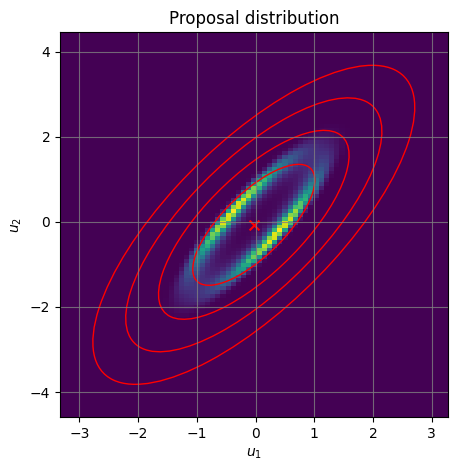

In [51]:
elipse_DRAM.visualize_covariance_2d(ranges=ranges, visual=elipse_DRAM.C[-1], show=True)

#### Parameters

In [32]:
param_dict = {
    "C0": [None],
    "scale_factor": [None],
    "burnin": [0.2],
    "eps": [1e-5],
    "t0": [0.01],
    "update_step": [1],
    "gammas": [None, [1.5, 1.0, 0.5], [1.5, 1.0, 0.25], [1.0, 0.5, 0.25]],
    "num_stages": [3]
}

benchmark_inputs = {
    "chains": 10,
    "num_samples": 10000,
    "initial": None,
    "visualize": False,
    "ranges": [(-10, 10), (-10, 10)],
    "Acc": True,
    "distance": False,
    "autocorrelation": True,
    "ESS": True,
    "R_hat": True,
    "KL": True,
    "old": False,
    "runs": 5
}

# Call benchmark_parametrs
elipse_DRAM_benchmark_parameters = benchmark_parametrs(
    sampler=elipse_DRAM,
    param_dict=param_dict,
    benchmark_inputs=benchmark_inputs
)

# Print the results
elipse_DRAM_benchmark_parameters

e:\Code\BC\Codes\SamplingLIB.py:1171: RuntimeWarning: divide by zero encountered in log1p
  if self.log:
e:\Code\BC\Codes\SamplingLIB.py:1174: RuntimeWarning: divide by zero encountered in log1p
  
e:\Code\BC\Codes\SamplingLIB.py:1171: RuntimeWarning: divide by zero encountered in log1p
  if self.log:
e:\Code\BC\Codes\SamplingLIB.py:1174: RuntimeWarning: divide by zero encountered in log1p
  
e:\Code\BC\Codes\SamplingLIB.py:1171: RuntimeWarning: divide by zero encountered in log1p
  if self.log:
e:\Code\BC\Codes\SamplingLIB.py:1174: RuntimeWarning: divide by zero encountered in log1p
  
e:\Code\BC\Codes\SamplingLIB.py:1171: RuntimeWarning: divide by zero encountered in log1p
  if self.log:
e:\Code\BC\Codes\SamplingLIB.py:1174: RuntimeWarning: divide by zero encountered in log1p
  


C0 scale_factor  burnin      eps    t0  update_step            gammas  \
0  None         None     0.2  0.00001  0.01            1              None   
1  None         None     0.2  0.00001  0.01            1   [1.5, 1.0, 0.5]   
2  None         None     0.2  0.00001  0.01            1  [1.5, 1.0, 0.25]   
3  None         None     0.2  0.00001  0.01            1  [1.0, 0.5, 0.25]   

   num_stages  IAT_avg  IAT_max      ESS  Cost_per_sample  Cost_per_ESS  \
0           3   7.9242   8.1506  12625.6           2.4418       19.3506   
1           3   7.0072   7.1740  14275.2           2.5578       17.9244   
2           3   7.2678   7.5338  13768.4           2.5570       18.5836   
3           3   7.7894   7.9772  12842.6           2.4372       18.9838   

      Acc  R_hat_avg  R_hat_max      KL  
0  0.4832     1.0006     1.0007  0.0287  
1  0.4114     1.0004     1.0005  0.0295  
2  0.4614     1.0006     1.0009  0.0297  
3  0.4874     1.0009     1.0012  0.0297

### **Banana distribution (dim=2)**

In [ ]:
initial_cov = None
scale_factor = None
burnin = 0.2
eps = 1e-5
update_step = 1
gammas = [1.5, 1.0, 0.5]
num_stages = 3

banana_DRAM = DRAM(distribution=banana, 
                   initial_cov=initial_cov, 
                   scale_factor=scale_factor,
                   burnin=burnin, 
                   eps=eps, 
                   update_step=update_step, 
                   gammas=gammas, 
                   num_stages=num_stages)

#### Benchmark

In [56]:
chains = 10
num_samples = 10000
initial = None
visualize = False
ranges=[(-3, 3), (-3, 3)]

Acc = True
distance = False
autocorrelation = True
ESS = True
R_hat = True
KL = True
old = False
runs = 10

banana_DRAM_benchmark_average, banana_DRAM_average_all_samples, banana_DRAM_benchmarks = benchmark_average(
    sampler=banana_DRAM,
    runs=runs,
    chains=chains,
    num_samples=num_samples,
    initial=initial,
    ranges=ranges,
    visualize=visualize,
    Acc=Acc,
    distance=distance,
    autocorrelation=autocorrelation,
    ESS=ESS,
    R_hat=R_hat,
    KL=KL,
    old=old
)

banana_DRAM.print_info()

e:\Code\BC\Codes\SamplingLIB.py:1171: RuntimeWarning: divide by zero encountered in log1p
  if self.log:


Sampling Method: DRAM
Scale Factor: 2.88
t0: 0.01
Initial covariance (C0): [[2.88 0.  ]
 [0.   2.88]]
Covariance Matrix: [[1.38166426 0.95849887]
 [0.95849887 1.66635265]]
Epsilon: 1e-05
Burn-in: 0.2
Update Step: 1
Number of Stages: 2
Gammas: [1.0, 0.25]
Mean of Samples: [0.51313945 0.76654892]
Acceptance rate for stage 1: 13.03%
Acceptance rate for stage 2: 21.97%
-----------------------------------------------------------------------------------------
Acceptance rate: 32.14%


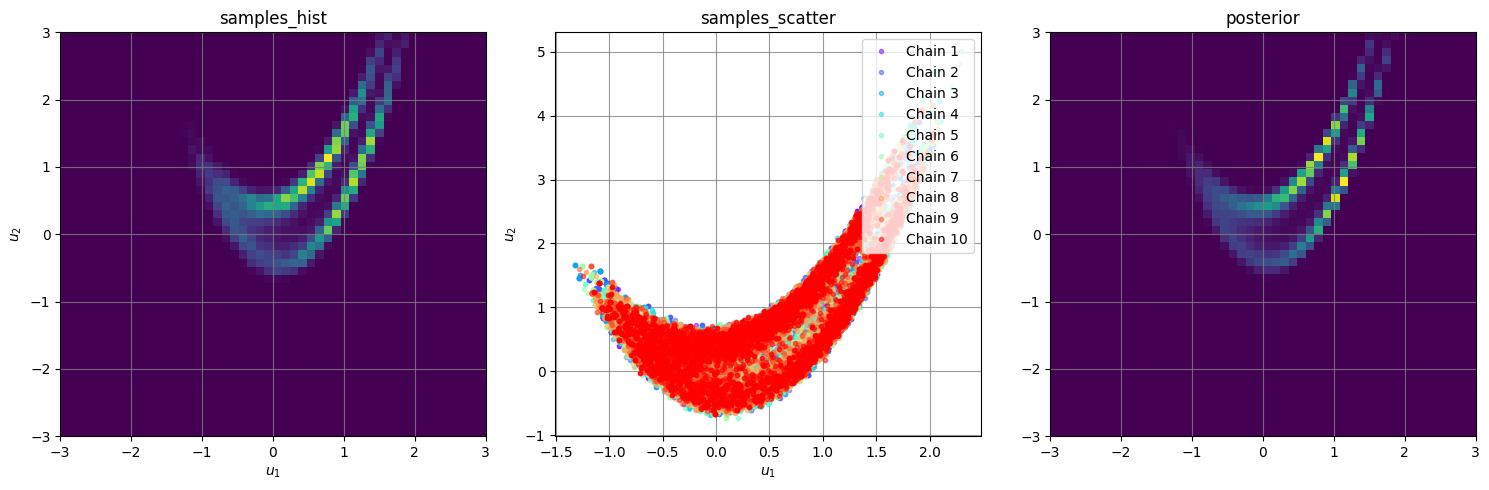

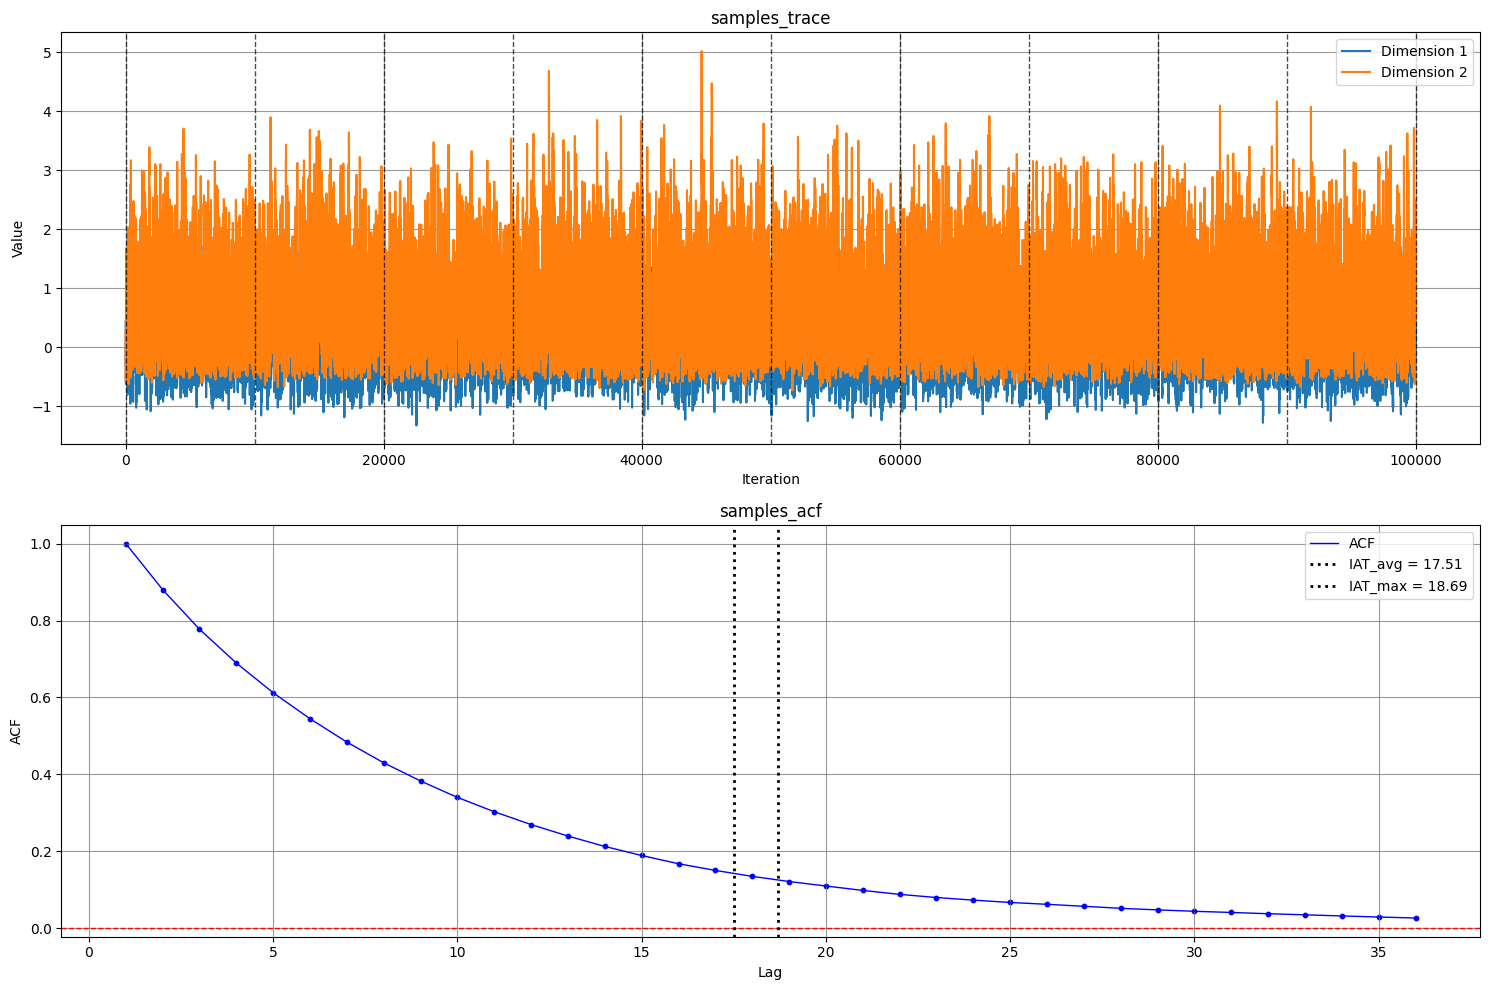

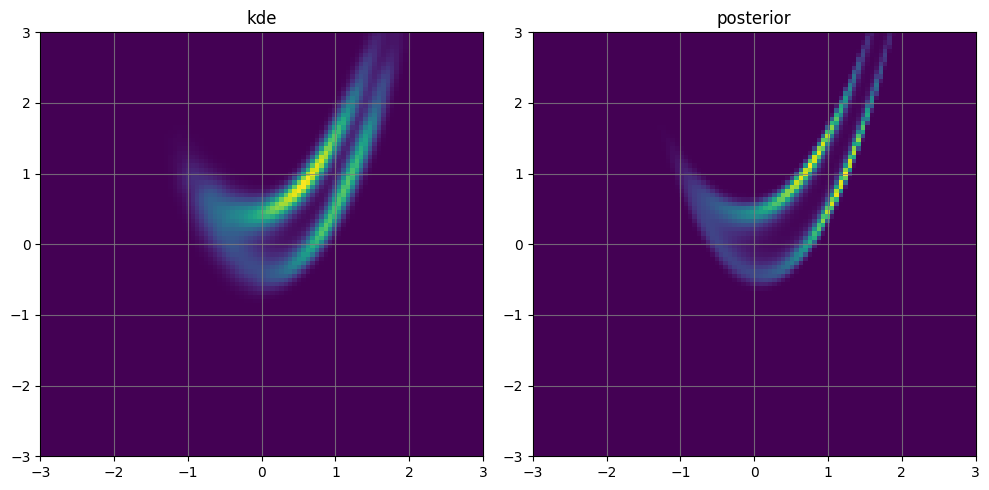

Runs  IAT_avg  IAT_max     ESS  Cost_per_sample  Cost_per_ESS     Acc  \
0     Run 1  17.5150  18.6880  5709.0           1.8620       32.6100  0.3200   
1     Run 2  17.9380  18.5420  5574.0           1.8560       33.2940  0.3210   
2     Run 3  16.1720  16.2330  6183.0           1.8650       30.1710  0.3210   
3     Run 4  17.0190  17.3140  5875.0           1.8630       31.7020  0.3250   
4     Run 5  16.1250  16.1900  6201.0           1.8610       30.0130  0.3220   
5     Run 6  16.9280  16.9870  5907.0           1.8690       31.6470  0.3180   
6     Run 7  17.3030  18.2890  5779.0           1.8700       32.3620  0.3210   
7     Run 8  16.9420  17.3920  5902.0           1.8650       31.5990  0.3220   
8     Run 9  17.4640  17.9720  5726.0           1.8650       32.5710  0.3260   
9    Run 10  15.9100  16.6420  6285.0           1.8700       29.7490  0.3230   
10  Average  16.9316  17.4249  5914.1           1.8646       31.5718  0.3219   

    R_hat_avg  R_hat_max      KL  
0      1.0022     1.0032  0.2051  
1      1.0009     1.0011  0.1941  
2      1.0011     1.0017  0.2039  
3      1.0015     1.0016  0.1994  
4      1.0016     1.0019  0.2008  
5      1.0013     1.0015  0.2008  
6      1.0011     1.0011  0.1963  
7      1.0017     1.0019  0.2042  
8      1.0020     1.0020  0.2023  
9      1.0015     1.0019  0.2046  
10     1.0015     1.0018  0.2012

In [57]:
samples = banana_DRAM_average_all_samples[0]
banana_DRAM.visualize(["samples_hist", "samples_scatter", "posterior"], ranges=ranges, samples=samples)
banana_DRAM.visualize(["samples_trace", "samples_acf"], ranges=ranges, samples=samples, vertical=True)
banana_DRAM.sampling_quality(samples, visualise=True, ranges=ranges)
banana_DRAM_benchmark_average
#banana_DRAM_benchmark_average.to_excel("banana_DRAM_benchmark_average.xlsx", index=False)
#banana_DRAM_benchmarks[0].to_excel("banana_DRAM_benchmark.xlsx", index=False)

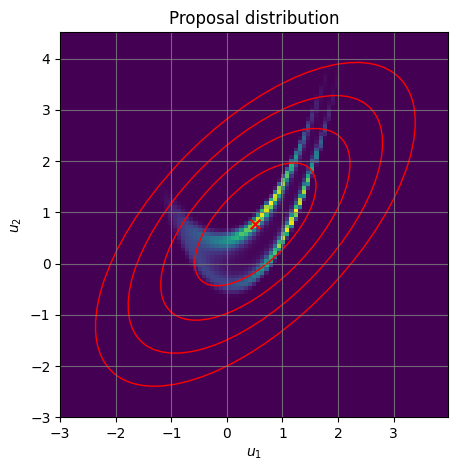

In [58]:
banana_DRAM.visualize_covariance_2d(ranges=ranges, visual=banana_DRAM.C[-1], show=True)

#### Parameters

In [30]:
param_dict = {
    "C0": [None],
    "scale_factor": [None],
    "burnin": [0.2],
    "eps": [1e-5],
    "t0": [0.01],
    "update_step": [1],
    "gammas": [None, [1.5, 1.0, 0.5], [1.5, 1.0, 0.25], [1.0, 0.5, 0.25]],
    "num_stages": [3]
}

benchmark_inputs = {
    "chains": 10,
    "num_samples": 10000,
    "initial": None,
    "visualize": False,
    "ranges": [(-10, 10), (-10, 10)],
    "Acc": True,
    "distance": False,
    "autocorrelation": True,
    "ESS": True,
    "R_hat": True,
    "KL": True,
    "old": False,
    "runs": 5
}

# Call benchmark_parametrs
banana_DRAM_benchmark_parameters = benchmark_parametrs(
    sampler=banana_DRAM,
    param_dict=param_dict,
    benchmark_inputs=benchmark_inputs
)

# Print the results
banana_DRAM_benchmark_parameters

e:\Code\BC\Codes\SamplingLIB.py:1171: RuntimeWarning: divide by zero encountered in log1p
  if self.log:
e:\Code\BC\Codes\SamplingLIB.py:1174: RuntimeWarning: divide by zero encountered in log1p
  
e:\Code\BC\Codes\SamplingLIB.py:1171: RuntimeWarning: divide by zero encountered in log1p
  if self.log:
e:\Code\BC\Codes\SamplingLIB.py:1174: RuntimeWarning: divide by zero encountered in log1p
  
e:\Code\BC\Codes\SamplingLIB.py:1171: RuntimeWarning: divide by zero encountered in log1p
  if self.log:
e:\Code\BC\Codes\SamplingLIB.py:1174: RuntimeWarning: divide by zero encountered in log1p
  
e:\Code\BC\Codes\SamplingLIB.py:1171: RuntimeWarning: divide by zero encountered in log1p
  if self.log:
e:\Code\BC\Codes\SamplingLIB.py:1174: RuntimeWarning: divide by zero encountered in log1p
  


C0 scale_factor  burnin      eps    t0  update_step            gammas  \
0  None         None     0.2  0.00001  0.01            1              None   
1  None         None     0.2  0.00001  0.01            1   [1.5, 1.0, 0.5]   
2  None         None     0.2  0.00001  0.01            1  [1.5, 1.0, 0.25]   
3  None         None     0.2  0.00001  0.01            1  [1.0, 0.5, 0.25]   

   num_stages  IAT_avg  IAT_max     ESS  Cost_per_sample  Cost_per_ESS  \
0           3  13.4396  13.7478  7459.2           2.6022       34.9678   
1           3  11.7582  11.8620  8507.6           2.6888       31.6144   
2           3  11.8692  12.0914  8427.8           2.6808       31.8182   
3           3  13.5306  13.8472  7393.6           2.5926       35.0810   

      Acc  R_hat_avg  R_hat_max      KL  
0  0.3776     1.0016     1.0019  0.1949  
1  0.3124     1.0007     1.0009  0.1947  
2  0.3542     1.0010     1.0013  0.1935  
3  0.3768     1.0013     1.0017  0.1956

### **Multimodal distribution (dim=2)**

In [33]:
initial_cov = None
scale_factor = 25.0
burnin = 0.2
eps = 1e-5
update_step = 1
gammas = [5.0, 1.0, 0.2]
num_stages = 3

multimodal_DRAM = DRAM(distribution=multimodal, 
                       initial_cov=initial_cov, 
                       scale_factor=scale_factor, 
                       burnin=burnin, 
                       eps=eps, 
                       update_step=update_step, 
                       gammas=gammas, 
                       num_stages=num_stages)

#### Benchmark

In [34]:
chains = 10
num_samples = 1000
initial = None
visualize = False
ranges = [(-10, 10), (-10, 10)]

Acc = True
distance = False
autocorrelation = True
ESS = True
R_hat = True
KL = True
old = False
runs = 10

multimodal_DRAM_benchmark_average, multimodal_DRAM_average_all_samples, multimodal_DRAM_benchmarks = benchmark_average(
    sampler=multimodal_DRAM,
    runs=runs,
    chains=chains,
    num_samples=num_samples,
    initial=initial,
    ranges=ranges,
    visualize=visualize,
    Acc=Acc,
    distance=distance,
    autocorrelation=autocorrelation,
    ESS=ESS,
    R_hat=R_hat,
    KL=KL,
    old=old
)

multimodal_DRAM.print_info()

e:\Code\BC\Codes\SamplingLIB.py:1171: RuntimeWarning: divide by zero encountered in log1p
  if self.log:
e:\Code\BC\Codes\SamplingLIB.py:1174: RuntimeWarning: divide by zero encountered in log1p
  


Sampling Method: DRAM
Scale Factor: 25.0
t0: 0.01
Initial covariance (C0): [[25.  0.]
 [ 0. 25.]]
Covariance Matrix: [[533.2326255  588.82050502]
 [588.82050502 810.56047451]]
Epsilon: 1e-05
Burn-in: 0.2
Update Step: 1
Number of Stages: 3
Gammas: [5.0, 1.0, 0.2]
Mean of Samples: [4.56821091 1.71627818]
Acceptance rate for stage 1: 0.10%
Acceptance rate for stage 2: 0.90%
Acceptance rate for stage 3: 1.21%
-----------------------------------------------------------------------------------------
Acceptance rate: 2.20%


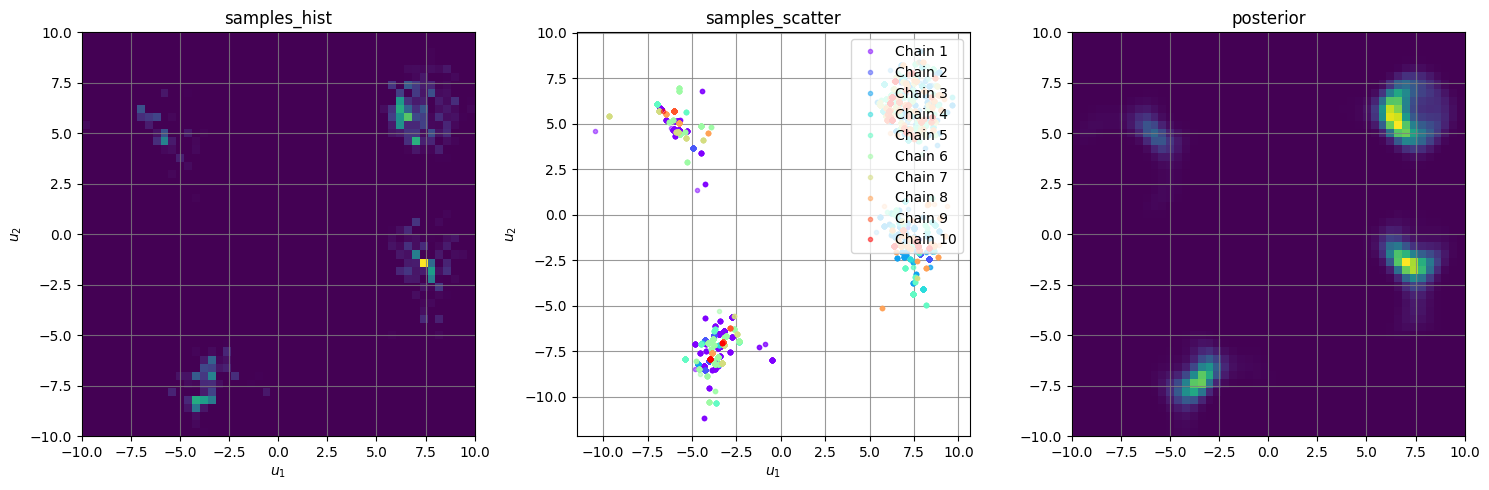

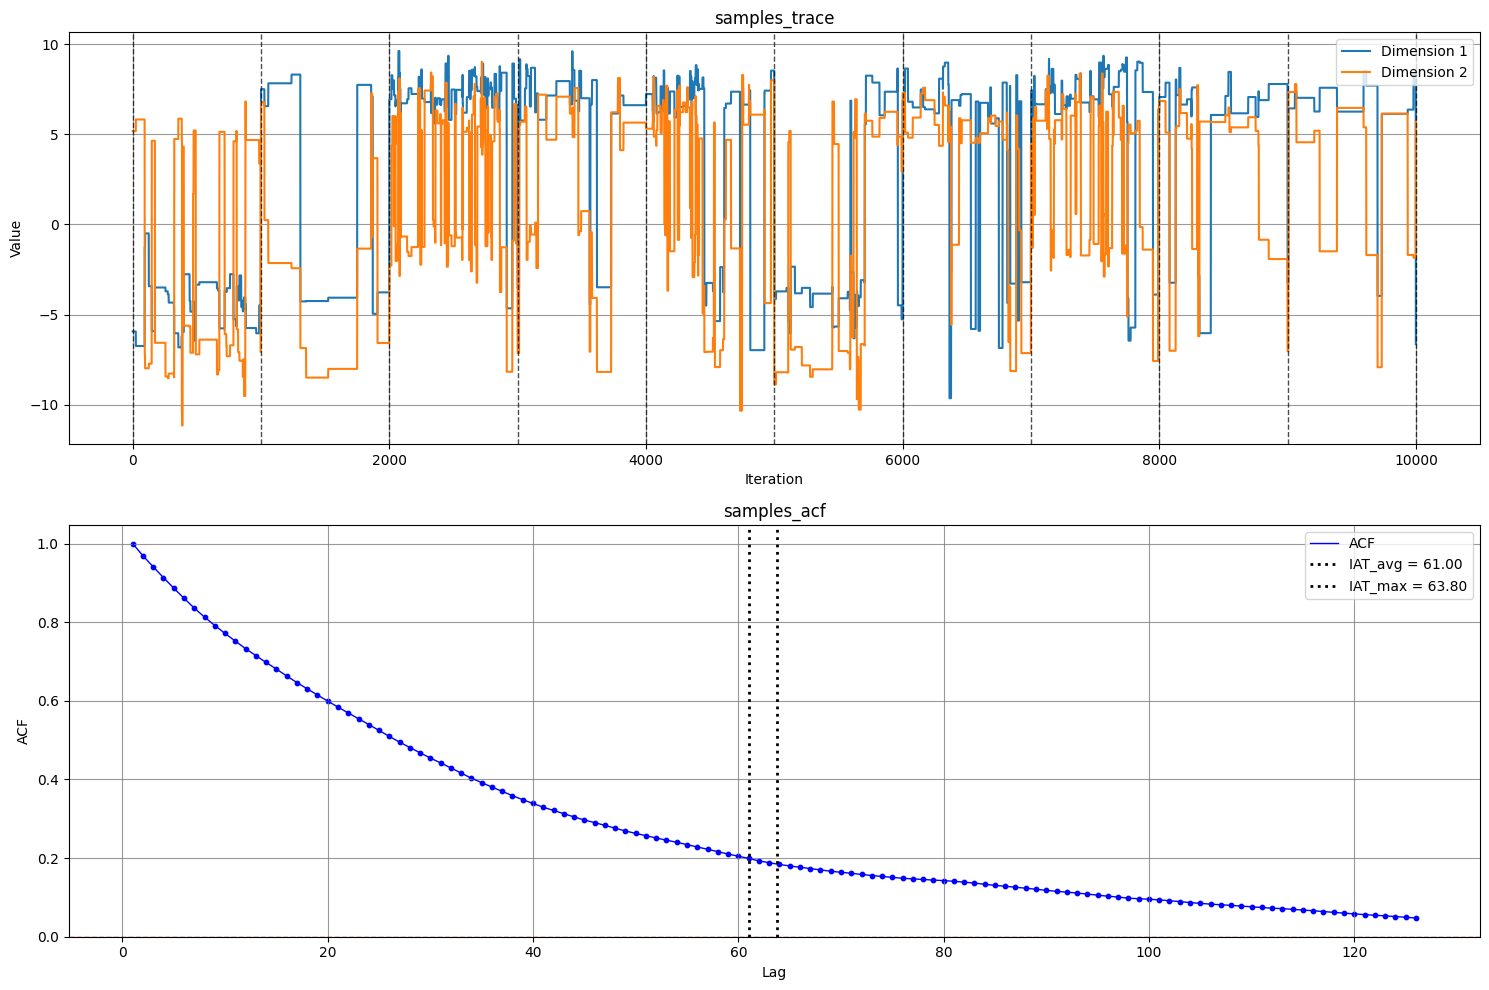

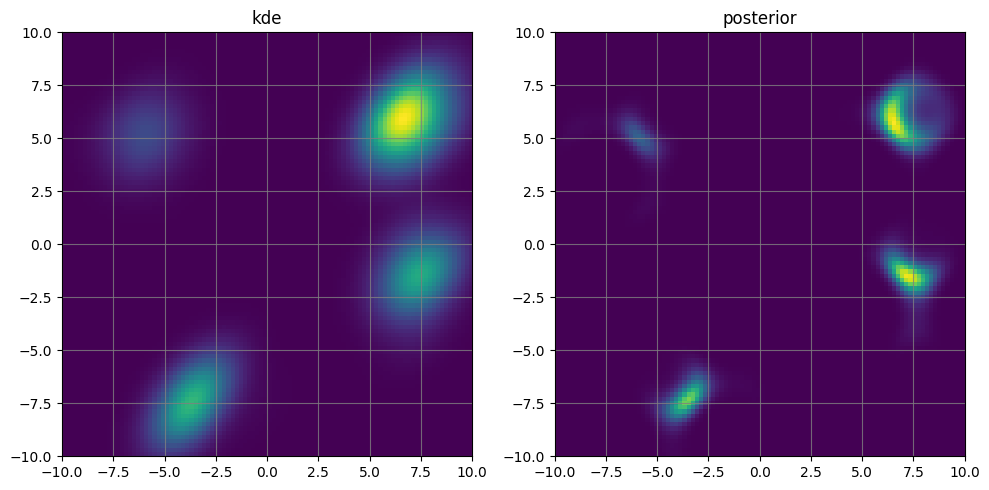

Runs  IAT_avg  IAT_max    ESS  Cost_per_sample  Cost_per_ESS     Acc  \
0     Run 1  61.0030  63.7960  163.0           2.9940      183.6810  0.0420   
1     Run 2  52.6970  53.0830  189.0           2.9770      157.5130  0.0450   
2     Run 3  58.4810  58.7370  170.0           2.9880      175.7650  0.0390   
3     Run 4  38.4660  40.2110  259.0           2.9590      114.2470  0.0440   
4     Run 5  63.8600  80.0980  156.0           2.9900      191.6670  0.0340   
5     Run 6  59.9170  69.0320  166.0           2.9650      178.6140  0.0460   
6     Run 7  51.9650  55.8430  192.0           2.9940      155.9380  0.0270   
7     Run 8  47.4970  51.9970  210.0           2.9730      141.5710  0.0440   
8     Run 9  48.2920  52.0470  207.0           2.9650      143.2370  0.0420   
9    Run 10  49.6260  49.7370  201.0           2.9890      148.7060  0.0400   
10  Average  53.1804  57.4581  191.3           2.9794      159.0939  0.0403   

    R_hat_avg  R_hat_max      KL  
0      1.1983     1.2863  0.5702  
1      1.1514     1.2082  0.5627  
2      1.0702     1.0806  0.5383  
3      1.1996     1.2589  0.6128  
4      1.0700     1.0904  0.5884  
5      1.1191     1.1489  0.5405  
6      1.2329     1.2736  0.5401  
7      1.1561     1.1679  0.6053  
8      1.0833     1.1306  0.5459  
9      1.1563     1.1638  0.5981  
10     1.1437     1.1809  0.5702

In [35]:
samples = multimodal_DRAM_average_all_samples[0]
multimodal_DRAM.visualize(["samples_hist", "samples_scatter", "posterior"], ranges=ranges, samples=samples)
multimodal_DRAM.visualize(["samples_trace", "samples_acf"], ranges=ranges, samples=samples, vertical=True)
multimodal_DRAM.sampling_quality(samples, visualise=True, ranges=ranges)
multimodal_DRAM_benchmark_average
#multimodal_DRAM_benchmark_average.to_excel("multimodal_DRAM_benchmark_average.xlsx", index=False)
#multimodal_DRAM_benchmarks[0].to_excel("multimodal_DRAM_benchmark.xlsx", index=False)

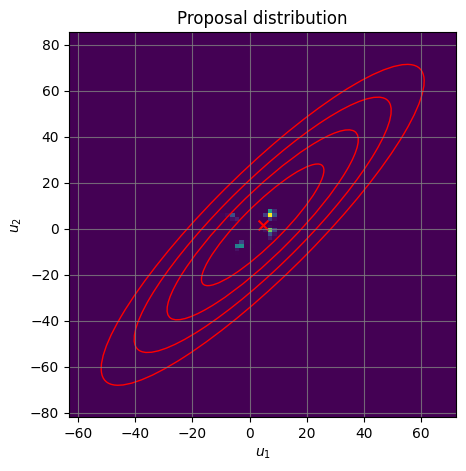

In [36]:
ranges = [(-10, 10), (-10, 10)]
multimodal_DRAM.visualize_covariance_2d(ranges=ranges, visual=1.0*multimodal_DRAM.C[-1], show=True, confidence_levels=[0.35, 0.65, 0.85, 0.95])

#### Parameters

In [ ]:
param_dict = {
    "C0": [None],
    "scale_factor": [25.0],
    "burnin": [0.2],
    "eps": [1e-5],
    "t0": [0.01],
    "update_step": [1],
    "gammas": [[1.5, 1.0, 0.25], [2.0, 1.0, 0.5]],
    "num_stages": [3]
}

benchmark_inputs = {
    "chains": 10,
    "num_samples": 10000,
    "initial": None,
    "visualize": False,
    "ranges": [(-10, 10), (-10, 10)],
    "Acc": True,
    "distance": False,
    "autocorrelation": True,
    "ESS": True,
    "R_hat": True,
    "KL": True,
    "old": False,
    "runs": 5
}

# Call benchmark_parametrs
multimodal_DRAM_benchmark_parameters = benchmark_parametrs(
    sampler=multimodal_DRAM,
    param_dict=param_dict,
    benchmark_inputs=benchmark_inputs
)

# Print the results
multimodal_DRAM_benchmark_parameters

e:\Code\BC\Codes\SamplingLIB.py:1171: RuntimeWarning: divide by zero encountered in log1p
  numerator_alpha += np.log1p(-np.exp(self._acceptance_probability(stage_posterior=stage_posterior[i:][::-1], proposals=proposals[i:][::-1], t=t)))
e:\Code\BC\Codes\SamplingLIB.py:1174: RuntimeWarning: divide by zero encountered in log1p
  denominator_alpha += np.log1p(-np.exp(self._acceptance_probability(stage_posterior=stage_posterior[:len(stage_posterior) - i], proposals=proposals[:len(stage_posterior) - i], t=t)))
e:\Code\BC\Codes\SamplingLIB.py:1171: RuntimeWarning: divide by zero encountered in log1p
  numerator_alpha += np.log1p(-np.exp(self._acceptance_probability(stage_posterior=stage_posterior[i:][::-1], proposals=proposals[i:][::-1], t=t)))
e:\Code\BC\Codes\SamplingLIB.py:1174: RuntimeWarning: divide by zero encountered in log1p
  denominator_alpha += np.log1p(-np.exp(self._acceptance_probability(stage_posterior=stage_posterior[:len(stage_posterior) - i], proposals=proposals[:len(stage_

C0  scale_factor  burnin      eps    t0  update_step            gammas  \
0  None          25.0     0.2  0.00001  0.01            1  [1.5, 1.0, 0.25]   
1  None          25.0     0.2  0.00001  0.01            1   [2.0, 1.0, 0.5]   

   num_stages   IAT_avg   IAT_max    ESS  Cost_per_sample  Cost_per_ESS  \
0           3  101.6760  108.5342  996.8           2.9842      303.5868   
1           3  127.9936  136.7596  789.4           2.9854      382.3410   

      Acc  R_hat_avg  R_hat_max      KL  
0  0.0304     1.0105      1.012  0.2933  
1  0.0200     1.0150      1.017  0.3025

In [ ]:
param_dict = {
    "C0": [None],
    "scale_factor": [12.25],
    "burnin": [0.2],
    "eps": [1e-5],
    "t0": [0.01],
    "update_step": [1],
    "gammas": [[4.0, 0.25], [2.0, 0.2]],
    "num_stages": [2]
}

benchmark_inputs = {
    "chains": 10,
    "num_samples": 10000,
    "initial": None,
    "visualize": False,
    "ranges": [(-10, 10), (-10, 10)],
    "Acc": True,
    "distance": False,
    "autocorrelation": True,
    "ESS": True,
    "R_hat": True,
    "KL": True,
    "old": False,
    "runs": 5
}

# Call benchmark_parametrs
multimodal_DRAM_benchmark_parameters2 = benchmark_parametrs(
    sampler=multimodal_DRAM,
    param_dict=param_dict,
    benchmark_inputs=benchmark_inputs
)

# Print the results
multimodal_DRAM_benchmark_parameters2

e:\Code\BC\Codes\SamplingLIB.py:1171: RuntimeWarning: divide by zero encountered in log1p
  numerator_alpha += np.log1p(-np.exp(self._acceptance_probability(stage_posterior=stage_posterior[i:][::-1], proposals=proposals[i:][::-1], t=t)))
e:\Code\BC\Codes\SamplingLIB.py:1171: RuntimeWarning: divide by zero encountered in log1p
  numerator_alpha += np.log1p(-np.exp(self._acceptance_probability(stage_posterior=stage_posterior[i:][::-1], proposals=proposals[i:][::-1], t=t)))


C0  scale_factor  burnin      eps    t0  update_step       gammas  \
0  None         12.25     0.2  0.00001  0.01            1  [4.0, 0.25]   
1  None         12.25     0.2  0.00001  0.01            1   [2.0, 0.2]   

   num_stages   IAT_avg  IAT_max     ESS  Cost_per_sample  Cost_per_ESS  \
0           2   95.1170   99.071  1060.8           1.9964      189.9066   
1           2  102.5338  115.653   975.6           1.9912      204.3084   

      Acc  R_hat_avg  R_hat_max      KL  
0  0.0356     1.0097     1.0121  0.3044  
1  0.0518     1.0103     1.0128  0.2996

In [ ]:
param_dict = {
    "C0": [None],
    "scale_factor": [25.0],
    "burnin": [0.2],
    "eps": [1e-5],
    "t0": [0.01],
    "update_step": [1],
    "gammas": [[1.0, 0.5, 0.25], [2.0, 1.0, 0.25]],
    "num_stages": [3]
}

benchmark_inputs = {
    "chains": 10,
    "num_samples": 10000,
    "initial": None,
    "visualize": False,
    "ranges": [(-10, 10), (-10, 10)],
    "Acc": True,
    "distance": False,
    "autocorrelation": True,
    "ESS": True,
    "R_hat": True,
    "KL": True,
    "old": False,
    "runs": 5
}

# Call benchmark_parametrs
multimodal_DRAM_benchmark_parameters3 = benchmark_parametrs(
    sampler=multimodal_DRAM,
    param_dict=param_dict,
    benchmark_inputs=benchmark_inputs
)

# Print the results
multimodal_DRAM_benchmark_parameters3

e:\Code\BC\Codes\SamplingLIB.py:1171: RuntimeWarning: divide by zero encountered in log1p
  numerator_alpha += np.log1p(-np.exp(self._acceptance_probability(stage_posterior=stage_posterior[i:][::-1], proposals=proposals[i:][::-1], t=t)))
e:\Code\BC\Codes\SamplingLIB.py:1174: RuntimeWarning: divide by zero encountered in log1p
  denominator_alpha += np.log1p(-np.exp(self._acceptance_probability(stage_posterior=stage_posterior[:len(stage_posterior) - i], proposals=proposals[:len(stage_posterior) - i], t=t)))
e:\Code\BC\Codes\SamplingLIB.py:1171: RuntimeWarning: divide by zero encountered in log1p
  numerator_alpha += np.log1p(-np.exp(self._acceptance_probability(stage_posterior=stage_posterior[i:][::-1], proposals=proposals[i:][::-1], t=t)))
e:\Code\BC\Codes\SamplingLIB.py:1174: RuntimeWarning: divide by zero encountered in log1p
  denominator_alpha += np.log1p(-np.exp(self._acceptance_probability(stage_posterior=stage_posterior[:len(stage_posterior) - i], proposals=proposals[:len(stage_

C0  scale_factor  burnin      eps    t0  update_step            gammas  \
0  None          25.0     0.2  0.00001  0.01            1  [1.0, 0.5, 0.25]   
1  None          25.0     0.2  0.00001  0.01            1  [2.0, 1.0, 0.25]   

   num_stages  IAT_avg   IAT_max     ESS  Cost_per_sample  Cost_per_ESS  \
0           3  90.8248  101.1420  1108.4           2.9764      270.4734   
1           3  97.1588  102.9484  1034.4           2.9852      290.1780   

      Acc  R_hat_avg  R_hat_max      KL  
0  0.0432     1.0102     1.0133  0.2942  
1  0.0284     1.0122     1.0127  0.2996

## **DREAM**

### **Multimodal distribution (dim=2)**

In [37]:
chains = None
scale_factor = None
burnin = 0.2
nCR = 3
max_pairs = 3
eps = 1e-5
outlier_detection = True

multimodal_DREAM = DREAM(distribution=multimodal, 
                    chains=chains, 
                    scale_factor=scale_factor, 
                    burnin=burnin, 
                    nCR=nCR, 
                    max_pairs=max_pairs, 
                    eps=eps,
                    outlier_detection=outlier_detection)

#### Benchmark

In [38]:
chains = 10
num_samples = 1000
initial = None
visualize = False
ranges = [(-10, 10), (-10, 10)]

Acc = True
distance = False
autocorrelation = True
ESS = True
R_hat = True
KL = True
old = False
runs = 10

multimodal_DREAM_benchmark_average, multimodal_DREAM_average_all_samples, multimodal_DREAM_benchmarks = benchmark_average(
    sampler=multimodal_DREAM,
    runs=runs,
    chains=chains,
    num_samples=num_samples,
    initial=initial,
    ranges=ranges,
    visualize=visualize,
    Acc=Acc,
    distance=distance,
    autocorrelation=autocorrelation,
    ESS=ESS,
    R_hat=R_hat,
    KL=KL,
    old=old
)

multimodal_DREAM.print_info()

Sampling Method: DREAM
Number of Chains: 10
Scale Factor: 2.38
Burn-in: 0.2
Max Pairs: 3
Epsilon: 1e-05
Outlier Detection: True
Outlier Resets: 0
R_hat: [1.16107794 1.12976557]
nCR: 3
p_a: [0.30461038 0.38710645 0.30828317]
h_a: [3717. 4467. 3816.]
Delta_a: [183.68289439 324.46036432 412.18321319]
Mean of Samples: [2.83200106 0.51839202]
Acceptance rate for chain 1: 26.00%
Acceptance rate for chain 2: 26.00%
Acceptance rate for chain 3: 23.80%
Acceptance rate for chain 4: 29.30%
Acceptance rate for chain 5: 25.80%
Acceptance rate for chain 6: 27.90%
Acceptance rate for chain 7: 26.60%
Acceptance rate for chain 8: 28.90%
Acceptance rate for chain 9: 26.90%
Acceptance rate for chain 10: 30.10%
-----------------------------------------------------------------------------------------
Acceptance rate: 27.13%


In [71]:
multimodal_DREAM_benchmark_average.to_excel("multimodal_DREAM_benchmark_average.xlsx", index=False)
multimodal_DREAM_benchmarks[4].to_excel("multimodal_DREAM_benchmark.xlsx", index=False)

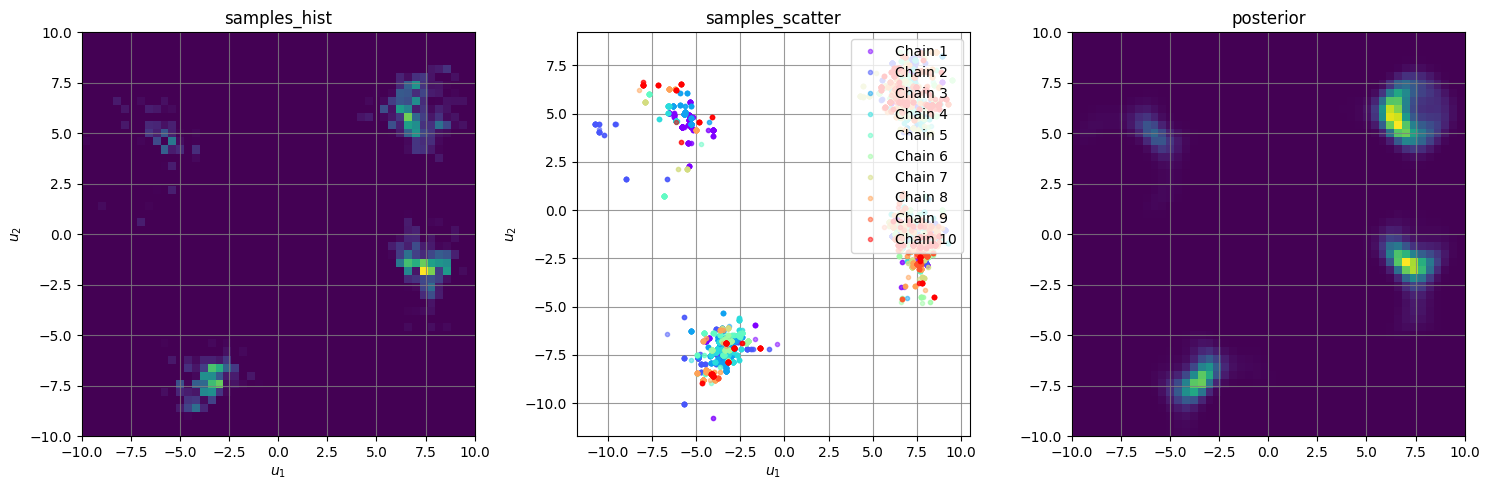

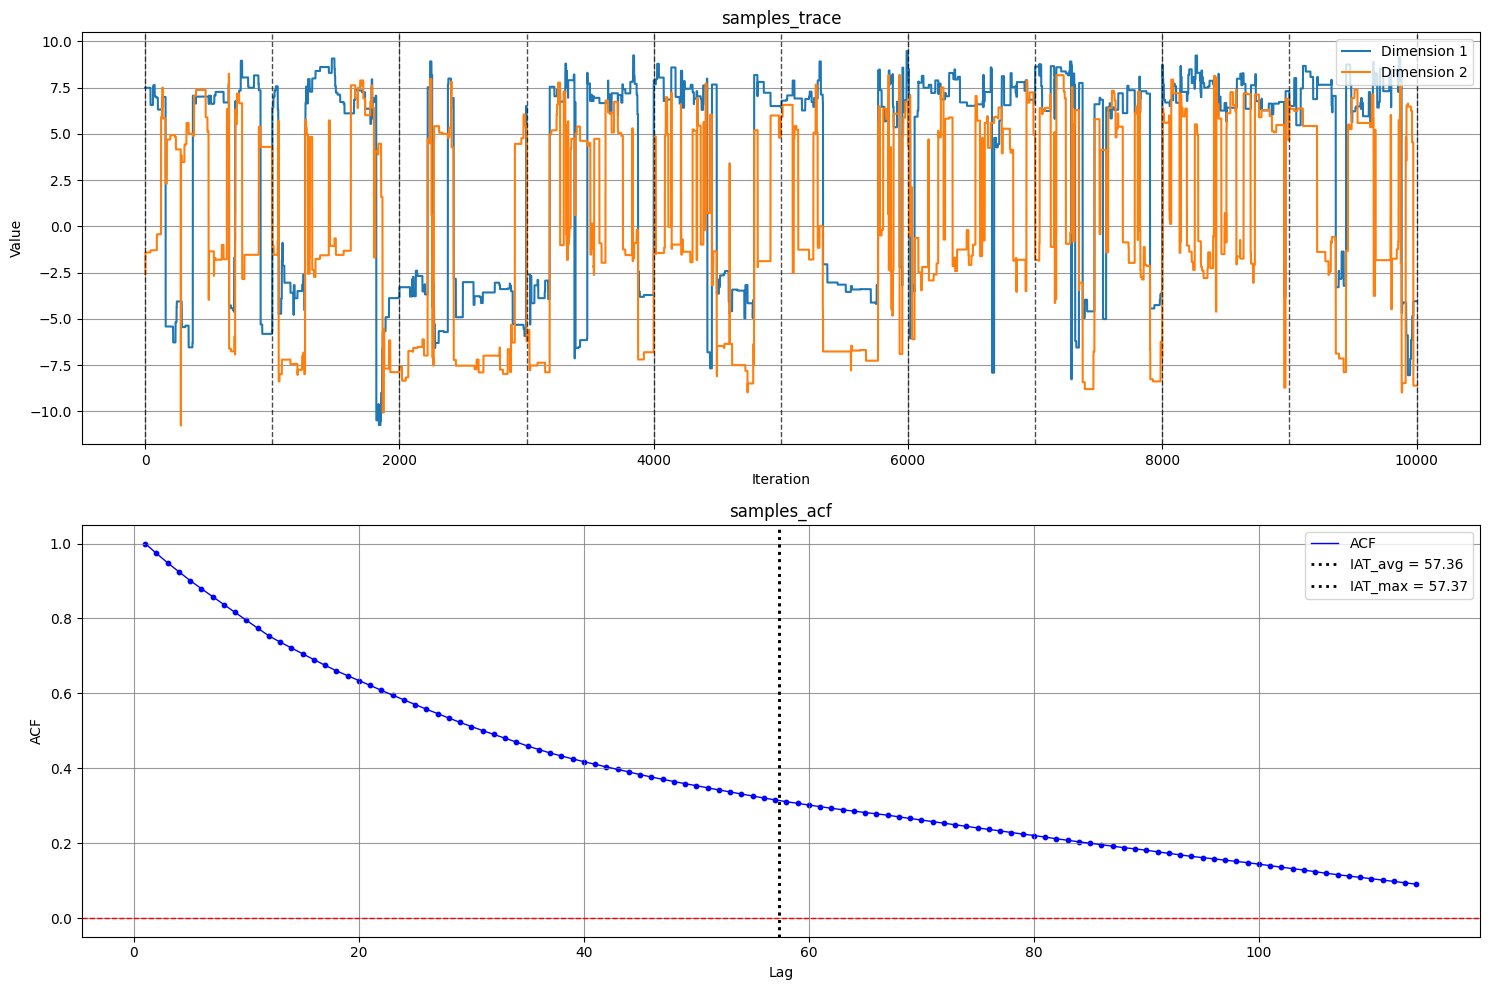

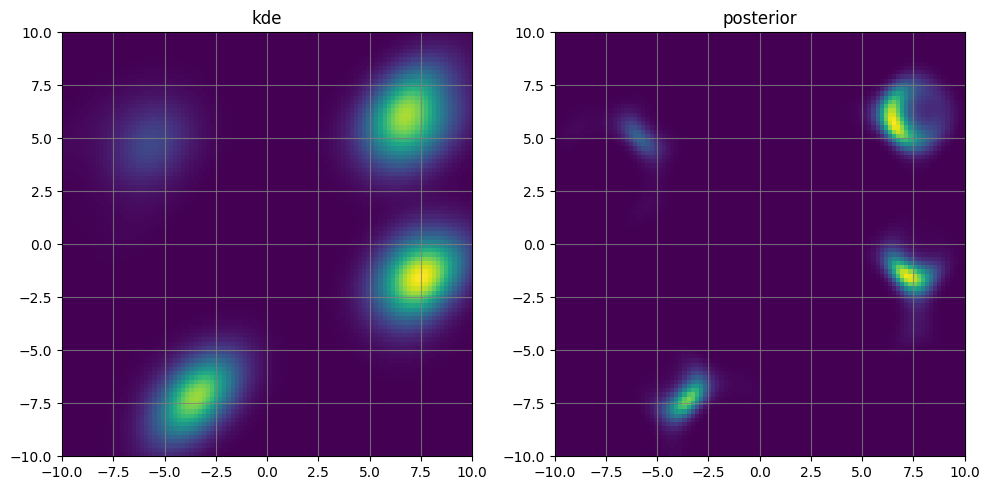

Runs  IAT_avg  IAT_max    ESS  Cost_per_sample  Cost_per_ESS     Acc  \
0     Run 1  38.2590  41.2190  261.0              1.0       38.3140  0.1930   
1     Run 2  56.1120  56.8070  178.0              1.0       56.1800  0.1720   
2     Run 3  69.6270  70.3580  143.0              1.0       69.9300  0.3100   
3     Run 4  71.2170  72.8890  140.0              1.0       71.4290  0.2350   
4     Run 5  57.3580  57.3710  174.0              1.0       57.4710  0.2510   
5     Run 6  72.0750  76.6780  138.0              1.0       72.4640  0.1810   
6     Run 7  52.9160  57.8110  188.0              1.0       53.1910  0.2080   
7     Run 8  63.3230  72.0660  157.0              1.0       63.6940  0.2250   
8     Run 9  77.1800  81.2080  129.0              1.0       77.5190  0.1990   
9    Run 10  78.1380  84.1010  127.0              1.0       78.7400  0.2720   
10  Average  63.6205  67.0508  163.5              1.0       63.8932  0.2246   

    R_hat_avg  R_hat_max      KL  
0      1.1709     1.1806  0.5563  
1      1.1745     1.1869  0.6168  
2      1.3585     1.4686  0.5768  
3      1.1609     1.1703  0.6488  
4      1.1771     1.1987  0.5709  
5      1.1793     1.2039  0.5963  
6      1.0980     1.1344  0.5480  
7      1.2409     1.3204  0.5159  
8      1.2260     1.2676  0.5527  
9      1.1454     1.1611  0.6530  
10     1.1932     1.2292  0.5836

In [74]:
ranges = [(-10, 10), (-10, 10)]
samples = multimodal_DREAM_average_all_samples[4]
multimodal_DREAM.visualize(["samples_hist", "samples_scatter", "posterior"], ranges=ranges, samples=samples)
multimodal_DREAM.visualize(["samples_trace", "samples_acf"], ranges=ranges, samples=samples, vertical=True)
multimodal_DREAM.sampling_quality(samples, visualise=True, ranges=ranges)
multimodal_DREAM_benchmark_average
#multimodal_DREAM_benchmark_average.to_excel("multimodal_DREAM_benchmark_average.xlsx", index=False)
#multimodal_DREAM_benchmarks[0].to_excel("multimodal_DREAM_benchmark.xlsx", index=False)

#### Parameters

In [ ]:
param_dict = {
    "chains": [None],
    "scale_factor": [None],
    "burnin": [0.1],
    "nCR": [1, 2, 3, 5],
    "max_pairs": [3, 5],
    "eps": [1e-5],
    "outlier_detection": [True]
}

benchmark_inputs = {
    "chains": 10,
    "num_samples": 10000,
    "initial": None,
    "visualize": False,
    "ranges": [(-10, 10), (-10, 10)],
    "Acc": True,
    "distance": False,
    "autocorrelation": True,
    "ESS": True,
    "R_hat": True,
    "KL": True,
    "old": False,
    "runs": 5
}

# Call benchmark_parametrs
multimodal_DREAM_benchmark_parameters = benchmark_parametrs(
    sampler=multimodal_DREAM,
    param_dict=param_dict,
    benchmark_inputs=benchmark_inputs
)

# Print the results
#multimodal_DREAM_benchmark_parameters.to_excel("multimodal_DREAM_benchmark_parametrs.xlsx", index=False)
multimodal_DREAM_benchmark_parameters

chains  scale_factor  burnin  nCR  max_pairs      eps  outlier_detection  \
0    None           2.5     0.1    1          1  0.00001               True   
1    None           2.5     0.1    1          2  0.00001               True   
2    None           2.5     0.1    1          3  0.00001               True   
3    None           2.5     0.1    1          5  0.00001               True   
4    None           2.5     0.1    2          1  0.00001               True   
5    None           2.5     0.1    2          2  0.00001               True   
6    None           2.5     0.1    2          3  0.00001               True   
7    None           2.5     0.1    2          5  0.00001               True   
8    None           2.5     0.1    3          1  0.00001               True   
9    None           2.5     0.1    3          2  0.00001               True   
10   None           2.5     0.1    3          3  0.00001               True   
11   None           2.5     0.1    3          5  0.00001               True   
12   None           2.5     0.1    5          1  0.00001               True   
13   None           2.5     0.1    5          2  0.00001               True   
14   None           2.5     0.1    5          3  0.00001               True   
15   None           2.5     0.1    5          5  0.00001               True   

     IAT_avg   IAT_max     ESS  Cost_per_sample  Cost_per_ESS     Acc  \
0   174.8926  221.8552   661.4              1.0      175.0418  0.1050   
1   226.2310  355.6976   583.8              1.0      226.6000  0.1362   
2   145.7878  181.7580   856.0              1.0      145.9614  0.0786   
3   131.1238  144.3296   775.4              1.0      131.2242  0.0592   
4   195.7170  247.6354   624.4              1.0      196.0502  0.2236   
5   160.5090  221.5542   714.0              1.0      160.6514  0.2324   
6   128.1986  156.9074  1497.2              1.0      128.3148  0.2238   
7   140.2310  146.5640   714.8              1.0      140.2850  0.1766   
8   133.8556  141.6926  1442.8              1.0      133.9858  0.2552   
9   122.8738  132.1042   819.0              1.0      122.9354  0.2262   
10  138.7782  146.1576   728.8              1.0      138.8976  0.2258   
11  151.4360  160.0270   676.6              1.0      151.5550  0.2200   
12  187.2400  195.5342   550.0              1.0      187.4170  0.2738   
13  130.6204  168.0938  1468.2              1.0      130.7136  0.2998   
14  186.7824  241.0030   601.4              1.0      186.9334  0.2658   
15  164.8806  194.8994  1213.6              1.0      164.9864  0.2588   

    R_hat_avg  R_hat_max      KL  
0      1.0079     1.0099  0.3015  
1      1.0058     1.0062  0.3429  
2      1.0090     1.0108  0.3006  
3      1.0106     1.0113  0.2983  
4      1.0185     1.0200  0.3035  
5      1.0100     1.0121  0.3380  
6      1.0109     1.0117  1.1272  
7      1.0177     1.0205  0.2935  
8      1.0168     1.0186  1.1387  
9      1.0118     1.0139  0.3046  
10     1.0225     1.0261  0.3008  
11     1.0203     1.0224  0.2985  
12     1.0201     1.0227  0.2975  
13     1.0099     1.0122  1.1604  
14     1.0179     1.0201  0.3070  
15     1.0263     1.0302  1.1325

In [8]:
multimodal_DREAM_benchmark_parameters.to_excel("multimodal_DREAM_benchmark_parametrs.xlsx", index=False)

### **Donut distribution (dim=2)**

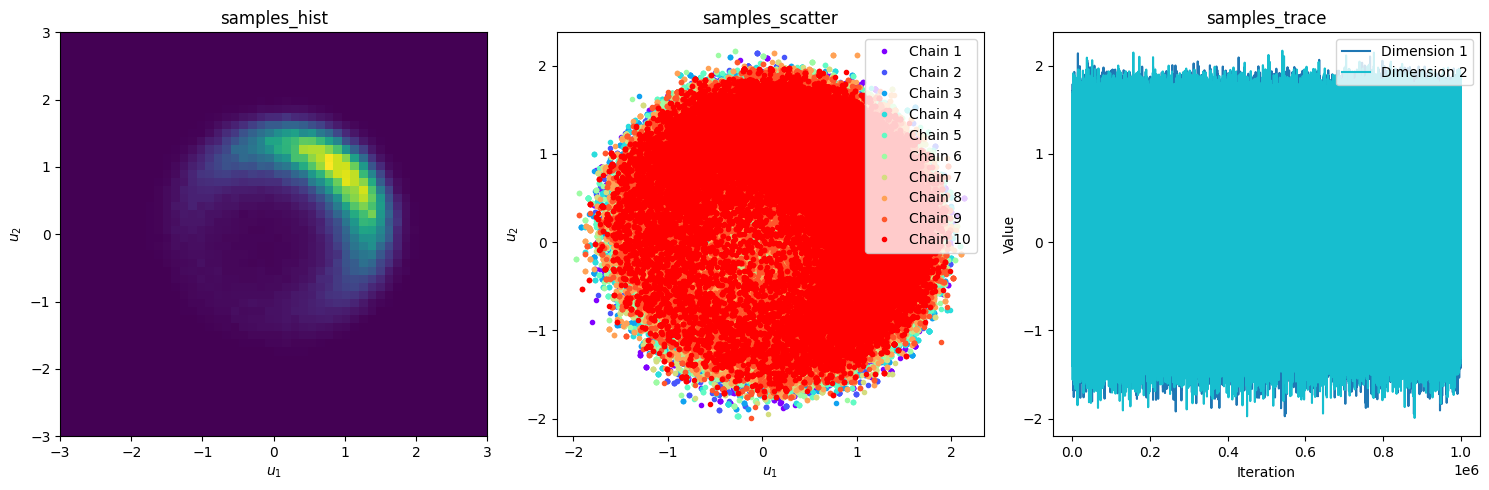

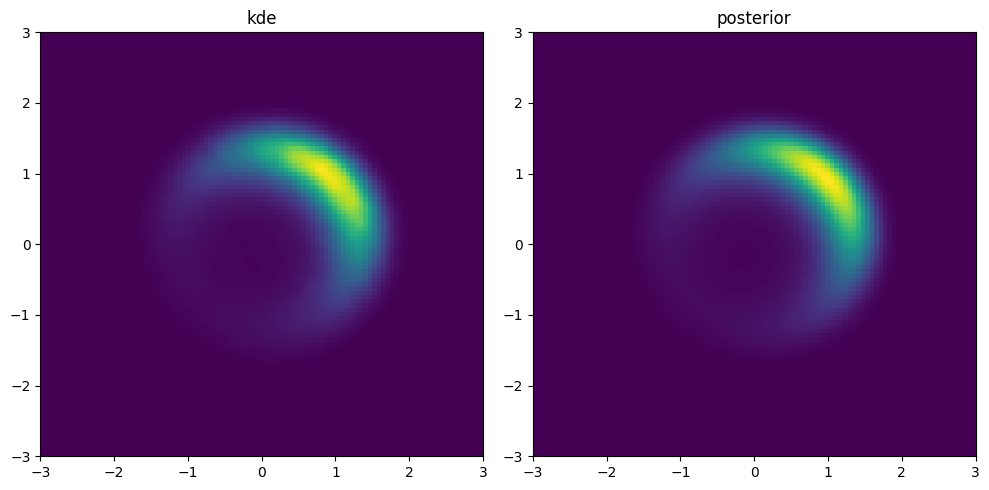

KL: 0.0023394521793110297


IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

In [8]:
chains = None
scale_factor = None
burnin = 0.2
nCR = 3
max_pairs = 3
eps = 1e-5
outlier_detection = True

donut_DREAM = DREAM(distribution=donut, 
                    chains=chains, 
                    scale_factor=scale_factor, 
                    burnin=burnin, 
                    nCR=nCR, 
                    max_pairs=max_pairs, 
                    eps=eps,
                    outlier_detection=outlier_detection)

initial = None
N = 100000

donut_DREAM.sample(initial=initial, N=N)
ranges = [(-3, 3), (-3, 3)]
donut_DREAM.visualize(["samples_hist", "samples_scatter", "samples_trace"], ranges=ranges)
print("KL:", donut_DREAM.sampling_quality(donut_DREAM.samples, ranges=ranges, visualise=True))
for chain in range(donut_DREAM.chains):
    print(f"Acceptance rate for chain {chain+1}: {((sum(donut_DREAM.acc[chain,:,1])/len(donut_DREAM.samples))*100):.2f}%")
print("-----------------------------------------------------------------------------------------")
print(f"Acceptance rate: {((np.sum(donut_DREAM.acc[:,:,1])/(len(donut_DREAM.samples)*donut_DREAM.chains))*100):.2f}%")

In [ ]:
smpls = donut_DREAM.samples.transpose(1, 0, 2).reshape(-1, 2)
print("Samples shape:", smpls.shape)
print("Mean of samples:", np.mean(smpls, axis=0))
normalized_euclidean_distance(smpls, np.array([1.0, 1.0]))
#print("True mean:", donut_DREAM.true_mean)

Samples shape: (1000000, 2)
Mean of samples: [0.62576797 0.63184053]


### **Banana distribution (dim=2)**

In [ ]:
chains = None
scale_factor = None
burnin = 0.2
nCR = 3
max_pairs = 3
eps = 1e-5
outlier_detection = True

banana_DREAM = DREAM(distribution=banana, 
                     chains=chains, 
                     scale_factor=scale_factor, 
                     burnin=burnin, 
                     nCR=nCR, 
                     max_pairs=max_pairs, 
                     eps=eps,
                     outlier_detection=outlier_detection)

TypeError: DREAM.__init__() got an unexpected keyword argument 'num_stages'

In [ ]:
chains = 10
num_samples = 10000
initial = None
visualize = False
ranges = [(-10, 10), (-10, 10)]

Acc = True
distance = False
autocorrelation = True
ESS = True
R_hat = True
KL = True
old = False
runs = 10

banana_DREAM_benchmark_average, banana_DREAM_average_all_samples, banana_DREAM_benchmarks = benchmark_average(
    sampler=banana_DREAM,
    runs=runs,
    chains=chains,
    num_samples=num_samples,
    initial=initial,
    ranges=ranges,
    visualize=visualize,
    Acc=Acc,
    distance=distance,
    autocorrelation=autocorrelation,
    ESS=ESS,
    R_hat=R_hat,
    KL=KL,
    old=old
)

banana_DREAM.print_info()

In [ ]:
samples = banana_DREAM_average_all_samples[0]
banana_DREAM.visualize(["samples_hist", "samples_scatter", "posterior"], ranges=ranges, samples=samples)
banana_DREAM.visualize(["samples_trace", "samples_acf"], ranges=ranges, samples=samples, vertical=True)
banana_DREAM.sampling_quality(samples, visualise=True, ranges=ranges)
banana_DREAM_benchmark_average
#banana_DREAM_benchmark_average.to_excel("banana_DREAM_benchmark_average.xlsx", index=False)
#banana_DREAM_benchmarks[0].to_excel("banana_DREAM_benchmark.xlsx", index=False)

### **Multidim distribution (dim=39)**

In [4]:
chains = 20
scale_factor = None
burnin = 0.2
nCR = 3
max_pairs = 3
eps = 1e-5
num_stages = 1
outlier_detection = True

test_DREAM = DREAM(distribution=test, 
                   chains=chains, 
                   scale_factor=scale_factor, 
                   burnin=burnin, 
                   nCR=nCR, 
                   max_pairs=max_pairs, 
                   eps=eps, 
                   num_stages=num_stages, 
                   outlier_detection=outlier_detection)

initial = None
N = 10000

test_DREAM.sample(initial=initial, N=N)

array([[[ 4.08185483,  1.31940056, -4.86977869, ..., -2.4956243 ,
          4.37354692,  1.64355489],
        [ 4.99570148,  0.64694204, -2.52893052, ...,  2.1062285 ,
          6.13958713, -0.58305309],
        [ 4.78118801,  1.89040109,  3.34574876, ...,  4.83857795,
          5.30538966,  0.13210338],
        ...,
        [ 8.09909725,  2.95409018, -8.05998945, ...,  3.70149006,
          6.30960484, -0.98283942],
        [ 2.26445665,  2.2724761 , -6.4542785 , ...,  3.40412235,
          7.05520416,  1.81605699],
        [ 6.98296137, -0.11954209, -4.94006712, ...,  5.74241675,
          2.37108427,  0.30822877]],

       [[ 4.08185483,  1.31940056, -4.86977869, ..., -2.4956243 ,
          4.37354692,  1.64355489],
        [ 4.99570148,  0.64694204, -2.52893052, ...,  1.13244312,
          6.75503496, -0.91609248],
        [ 4.78118801,  1.89040109,  3.34574876, ...,  4.83857795,
          5.30538966,  0.13210338],
        ...,
        [ 7.50490346,  2.79191911, -5.88036946, ...,  

In [5]:
print("Gelman-Rubin diagnostic R_hat per dimension:")
print(test_DREAM.R_hat)  # or simply print(donut_DREAM.R_hat) if computed within sample()

print("Acceptance rates per chain:")
print(test_DREAM.acc_rate)

Gelman-Rubin diagnostic R_hat per dimension:
[1.0171417  1.01000717 1.0098989  1.01036616 1.02783564 1.00566879
 1.01246773 1.01607423 1.01130847 1.01348254 1.01392582 1.01342816
 1.01372389 1.01486568 1.0094147  1.0288478  1.01805074 1.01775675
 1.00616496 1.02065899 1.01726504 1.0206967  1.01044446 1.01308482
 1.01014192 1.01215866 1.0252307  1.0132472  1.01666714 1.01238641
 1.01661067 1.01091174 1.01490932 1.00767669 1.01856129 1.01751734
 1.01039893 1.0192451  1.01754892]
Acceptance rates per chain:
[[0.2453]
 [0.2415]
 [0.246 ]
 [0.2399]
 [0.2504]
 [0.254 ]
 [0.2509]
 [0.2544]
 [0.2512]
 [0.2407]
 [0.246 ]
 [0.2472]
 [0.2436]
 [0.2442]
 [0.2511]
 [0.2501]
 [0.2427]
 [0.2475]
 [0.2419]
 [0.2404]]


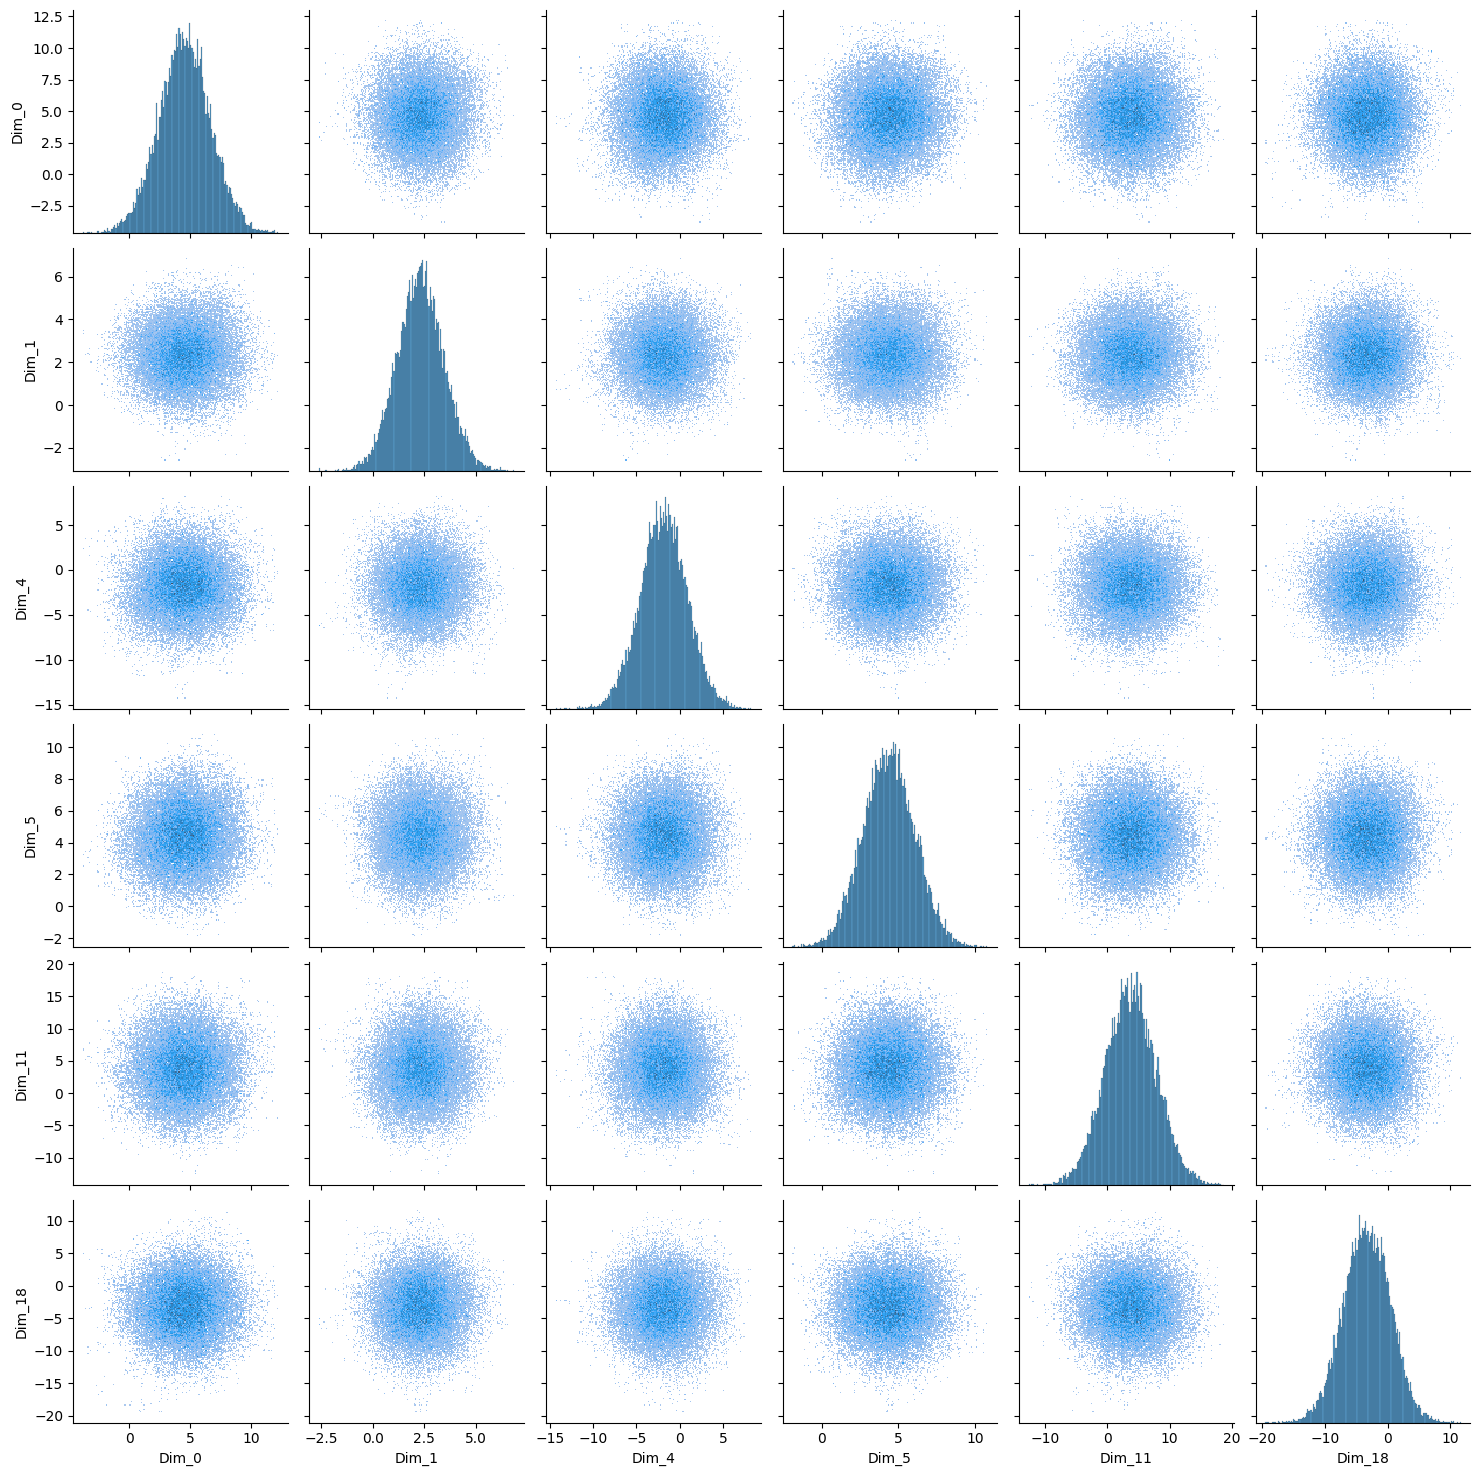

In [6]:
import seaborn as sns
import pandas as pd
import numpy as np

# Select a few random pairs of dimensions
num_pairs = 3
dimensions = test_DREAM.samples.shape[1]
random_pairs = np.random.choice(dimensions, size=(num_pairs, 2), replace=False)

# Reshape the samples array to 2D (combine the first two dimensions)
reshaped_samples = test_DREAM.samples.reshape(-1, test_DREAM.samples.shape[-1])

# Create a DataFrame for the selected dimensions
data = pd.DataFrame(reshaped_samples, columns=[f"Dim_{i}" for i in range(reshaped_samples.shape[1])])
selected_data = data.iloc[:, np.unique(random_pairs.flatten())]

# Plot pairplot
sns.pairplot(selected_data, kind='hist')

### **TSX**

In [ ]:
chains = 20
scale_factor = None
burnin = 0.1
nCR = 3
max_pairs = 3
eps = 1e-5
outlier_detection = True

TSX_DREAM = DREAM(distribution=TSX,
                   chains=chains, 
                   scale_factor=scale_factor, 
                   burnin=burnin, 
                   nCR=nCR, 
                   max_pairs=max_pairs, 
                   eps=eps, 
                   outlier_detection=outlier_detection)

#### Benchmark

In [ ]:
chains = 20
num_samples = 20
initial = None
visualize = False
ranges = [(-10, 10), (-10, 10)]

Acc = True
distance = False
autocorrelation = True
ESS = True
R_hat = True
KL = False
old = False
runs = 1

TSX_DREAM_benchmark_average, TSX_DREAM_average_all_samples, TSX_DREAM_benchmarks = benchmark_average(
    sampler=TSX_DREAM,
    runs=runs,
    chains=chains,
    num_samples=num_samples,
    initial=initial,
    ranges=ranges,
    visualize=visualize,
    Acc=Acc,
    distance=distance,
    autocorrelation=autocorrelation,
    ESS=ESS,
    R_hat=R_hat,
    KL=KL,
    old=old
)

TSX_DREAM.print_info()

In [ ]:
TSX_DREAM_benchmark_average

# NOTES

- remake visualize function --- (done)
    - split into subfunctions --- (done)
    - fix smaller issues --- (done)
    - easy to call --- (done)
    - adapt for Sampling algorithm classes --- (done)
- remake sampling algorithms into classes --- (done)
    - remake MH --- (done)
    - remake AM --- (done)
        - fix recursive formula in AM --- (done)
    - reamke DRAM --- (done)
        - add i-th stage proposal for DRAM --- (done)
        - fix acceptance_probability --- (done)
    - remake DREAM --- (done)
        - fix outlier detection --- (done)
        - add improve CR distribution --- (done)
        - add i-th stage proposal --- (done)
        - add initial population from prior --- (done)
        - Gelman-Rubin metric --- (done)
    - rework acc_rate --- (done)
- fix animate function --- (done)
- update function descriptions --- (done)
- remake posterior into log posterior --- (done)
    - allow both posterior and log_posterior --- (done)
    - auto create of likelihood and prior and combined posterior --- (done)
        - gaussian mulitimodal multinormal prior --- (done)
    - rework acceptance prob in all sampling algorithms --- (done)
- write theory for sampling algorithms --- (done)
    - MH --- (done)
    - AM --- (done)
    - DRAM --- (done)
    - DREAM --- (done)
-----------------------------------------------------------------------------------------------
- fixes
    - prior, likelihood, posterior --- (done)
    - DR in DREAM --- (done)
    - visualize function for dim > 2
- create high dimension distribution (multi-normal prolly)
- sampling evaluation
    - MH algorithm
        - posterior
        - metrics
        - write "Numerical experimets" section
    - AM algorithm
        - posterior
        - metrics
        - write "Numerical experimets" section
    - DRAM algorithm
        - posterior
        - metrics
        - write "Numerical experimets" section
    - DREAM algorithm
        - posterior
        - metrics
        - write "Numerical experimets" section
    - TSX_deflation
        - posterior
        - metrics
        - write "Numerical experimets" chapter
- metrics
    - acc_rate (for all chains and DR stages)
    - ESS + autocorrelation
    - model evaluation count
- write Problem setting chapter
- write Introduction + Conclusion

- try different setting for each algorithm for certain posterior (find worst, average, best)